<h1>Desafio 1 - Grupo 5</h1>

<h3><u>Intregrantes del grupo</u></h3>

- Lesertesseur, Diego
- Panizza, Camila  
- Pellecchia, Franco   
- Magariños, Néstor  
- Suarez, Horacio  

<h3><u>Objetivos</u></h3>
La inmobiliaria Properati publica periódicamente información sobre ofertas de propiedades
para venta y alquiler. Ud. deberá asesorar a la inmobiliaria a desarrollar un modelo de
regresión que permita predecir el precio por metro cuadrado de una propiedad. El objetivo
final es que el modelo que desarrollen sea utilizado como tasador automático a ser
aplicados a las próximas propiedades que sean comercializadas por la empresa. Para ello
la empresa le provee de un dataset correspondiente al primer semestre de 2017.

- Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias para lidiar con los datos perdidos en ciertas variables.
- Realizar un análisis descriptivo de las principales variables.
- Crear nuevas columnas a partir de las características dadas que puedan tener valor
predictivo.

<h3><u>Variables</u></h3>

- Fecha de creación
- Tipo de la propiedad (house, apartment, ph)
- Operación del aviso (sell, rent)
- Nombre del lugar
- Nombre del lugar + nombre de sus ‘padres’
- ID de geonames del lugar (si está disponible)
- Latitud,Longitud
- Precio original del aviso
- Moneda original del aviso (ARS, USD)
- Precio del aviso en moneda local (ARS)
- Precio aproximado en USD
- Superficie en m²
- Superficie cubierta en m²
- Precio en USD/m²
- Precio por m²
- N° de piso, si corresponde
- Ambientes
- URL en Properati
- Descripción
- Título
- URL de un thumbnail de la

<h3><u>Índice</u></h3>
<a href='#section_1'>1. Preparación del dataset</a> 

<a href='#section_2'>2. Data wrangling</a>  
<a href='#section_3'>3. Nuevas variables</a>  
<a href='#section_4'>4. Dataset final</a>

---
---
<b><a id='section_1'><h4>1. Preparación del dataset</h4></a></b>
<a href='#section_1_1'>1.1. Importación de librerías y carga del dataset</a>  
<a href='#section_1_2'>1.2. Descripción del dataset</a>  
<a href='#section_1_3'>1.3. Selección de columnas útiles</a>  
<a href='#section_1_4'>1.4. Detección de duplicados</a>

<b><a id='section_1_1'>1.1. Importación de librerías y carga del dataset</a>  </b>

In [7]:
import numpy as np
import pandas as pd
import re 
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline

In [8]:
data= pd.read_csv("../data/properati.csv")

---
<b><a id='section_1_2'>1.2. Descripción del dataset</a></b>

In [9]:
data_describe = pd.DataFrame(round(data.isnull().sum() /data.shape[0],2), columns= ['Porcentaje de nulos'])
data_describe['type'] = data.dtypes
data_describe = data_describe[['type','Porcentaje de nulos']]
data_describe['Nulos'] = data.isnull().sum()
values= []
example=[]
for x in data:
    values.append(len(data[x].unique()))
    example.append(data[x].unique())
data_describe['Valores distintos'] = values
data_describe['Ejemplos'] = example

data_describe

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
Unnamed: 0,int64,0.00,0,121220,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
operation,object,0.00,0,1,[sell]
property_type,object,0.00,0,4,"[PH, apartment, house, store]"
place_name,object,0.00,23,1061,"[Mataderos, La Plata, Liniers, Centro, Gualegu..."
place_with_parent_names,object,0.00,0,1164,"[|Argentina|Capital Federal|Mataderos|, |Argen..."
country_name,object,0.00,0,1,[Argentina]
state_name,object,0.00,0,28,"[Capital Federal, Bs.As. G.B.A. Zona Sur, Buen..."
geonames_id,float64,0.15,18717,647,"[3430787.0, 3432039.0, 3431333.0, 3435548.0, 3..."
lat-lon,object,0.43,51550,47204,"[-34.6618237,-58.5088387, -34.9038831,-57.9643..."
lat,float64,0.43,51550,46496,"[-34.6618237, -34.9038831, -34.6522615, -34.64..."


---
<b><a id='section_1_3'>1.3. Selección de columnas útiles</a></b>

In [10]:
columnasUtiles=   ['property_type','place_name','state_name', 'place_with_parent_names', 'price', 'currency','price_aprox_local_currency',
                   'price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2',
                   'rooms', 'expenses','description','title']
data_describe_utiles = data_describe.loc[columnasUtiles,:]
data_describe_utiles

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
property_type,object,0.00,0,4,"[PH, apartment, house, store]"
place_name,object,0.00,23,1061,"[Mataderos, La Plata, Liniers, Centro, Gualegu..."
state_name,object,0.00,0,28,"[Capital Federal, Bs.As. G.B.A. Zona Sur, Buen..."
place_with_parent_names,object,0.00,0,1164,"[|Argentina|Capital Federal|Mataderos|, |Argen..."
price,float64,0.17,20410,9747,"[62000.0, 150000.0, 72000.0, 95000.0, 64000.0,..."
currency,object,0.17,20411,5,"[USD, nan, ARS, PEN, UYU]"
price_aprox_local_currency,float64,0.17,20410,10365,"[1093959.0, 2646675.0, 1270404.0, 1676227.5, 1..."
price_aprox_usd,float64,0.17,20410,10365,"[62000.0, 150000.0, 72000.0, 95000.0, 64000.0,..."
surface_total_in_m2,float64,0.32,39328,1688,"[55.0, nan, 35.0, 53.0, 106.0, 45.0, 65.0, 151..."
surface_covered_in_m2,float64,0.16,19907,996,"[40.0, nan, 55.0, 35.0, 78.0, 60.0, 36.0, 30.0..."


---
<b><a id='section_1_4'>1.4. Deteción de duplicados</a></b>  
Se procede a eliminar las observaciones duplicadas según las variables indicadas en 'columnasDuplicadas'. Se opta por conservar las observaciones que tienen descripción más larga

In [11]:
columnasDuplicadas = ['property_type','place_name','state_name', 'place_with_parent_names',
                      'surface_total_in_m2','surface_covered_in_m2','title']
data[columnasDuplicadas].duplicated().sum()

19066

In [12]:
data['description_len'] = data['description'].apply(lambda x: len(str(x)))
data = data.sort_values(by=['description_len'], ascending= False)

In [13]:
display(data.shape)
data = data.drop_duplicates(subset = columnasDuplicadas, keep= 'first')
display(data.shape)

(121220, 27)

(102154, 27)

In [14]:
data = data.reset_index()

---
---

<b><a id='section_2'><h4>2. Data wrangling</h4></a></b>
<a href='#section_2_1'>2.1. Columna 'property_type'</a>  
<a href='#section_2_2'>2.2. Columnas 'country_name', 'state_name', 'place_name' y'place_with_parent_names'</a>  
<a href='#section_2_3'>2.3. Columnas 'price','currency','price_aprox_local_currency' y 'price_aprox_usd' </a>  
<a href='#section_2_4'>2.4. Columna 'rooms'</a>  
<a href='#section_2_5'>2.5. Columna 'floor'</a>  
<a href='#section_2_6'>2.6. Columnas 'surface_total_in_m2' y 'surface_covered_in_m2'</a>  
<a href='#section_2_7'>2.7. Columna 'price_usd_per_m2'</a>  

In [15]:
data['description_lower'] = data['description'].str.lower()
data['title_lower'] = data['title'].str.lower()

<b><a id='section_2_1'>2.1. Columna 'property_type'</a></b>

Análisis de valores y nulos

In [16]:
data_describe.loc[data_describe.index.isin(['property_type']),:]

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
property_type,object,0.0,0,4,"[PH, apartment, house, store]"


Visualización

,property_type
apartment,54.0
house,37.0
PH,5.2
store,3.9


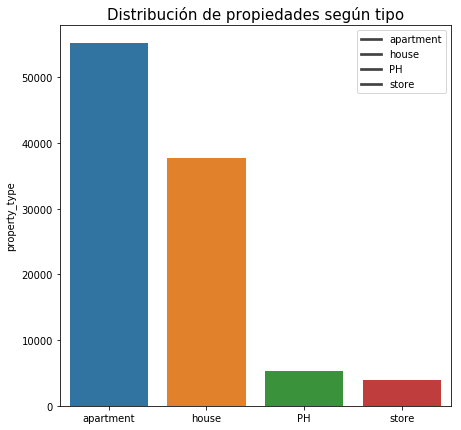

In [17]:
f, ax = plt.subplots()
f.set_figwidth(7)
f.set_figheight(7)
sns.barplot(y=data['property_type'].value_counts(),x=data['property_type'].value_counts().index)
plt.title("Distribución de propiedades según tipo",fontsize=15)
plt.legend(labels=data['property_type'].value_counts().index)
pd.DataFrame(round((data['property_type'].value_counts()/data.shape[0])*100,1))

---
<b><a id='section_2_2'>2.2. Columnas 'country_name', 'state_name', 'place_name' y'place_with_parent_names'</a></b>

Análisis de valores y nulos

In [18]:
data_describe.loc[data_describe.index.isin(['country_name', 'state_name', 'place_name','place_with_parent_names']),:]

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
place_name,object,0.0,23,1061,"[Mataderos, La Plata, Liniers, Centro, Gualegu..."
place_with_parent_names,object,0.0,0,1164,"[|Argentina|Capital Federal|Mataderos|, |Argen..."
country_name,object,0.0,0,1,[Argentina]
state_name,object,0.0,0,28,"[Capital Federal, Bs.As. G.B.A. Zona Sur, Buen..."


Dividimos la columna 'place_with_parent_names' y analizamos su contenido.

In [19]:
data['place_with_parent_names_clean'] = data['place_with_parent_names']

total_place = data['place_with_parent_names_clean'].apply(lambda row: len(row.split('|'))-2)
dic_ret = dict()
for i in range(total_place.max()):
    dic_ret['place_'+ str(i)] = ([None] * total_place.shape[0])

In [20]:
for row in data['place_with_parent_names_clean'].index:
    i=0;
    list_places = data['place_with_parent_names_clean'].loc[row].split('|')
    for x in list_places:
        if len(x)>0:
            colname='place_' + str(i)
            dic_ret[colname][row] = x
            i+=1

In [21]:
new_columns = pd.DataFrame(dic_ret)
data = data.join(new_columns)

In [22]:
data[['country_name','state_name','place_name','place_0','place_1','place_2','place_3','place_4']].sample(10)

,country_name,state_name,place_name,place_0,place_1,place_2,place_3,place_4
60452,Argentina,Buenos Aires Costa Atlántica,La Perla,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,La Perla,None
46167,Argentina,Bs.As. G.B.A. Zona Sur,Lomas de Zamora,Argentina,Bs.As. G.B.A. Zona Sur,Lomas de Zamora,Lomas de Zamora,None
90277,Argentina,Bs.As. G.B.A. Zona Oeste,Morón,Argentina,Bs.As. G.B.A. Zona Oeste,Morón,None,None
76268,Argentina,Bs.As. G.B.A. Zona Norte,Jose Leon Suarez,Argentina,Bs.As. G.B.A. Zona Norte,General San Martín,Jose Leon Suarez,None
48614,Argentina,Capital Federal,Las Cañitas,Argentina,Capital Federal,Las Cañitas,None,None
38186,Argentina,Corrientes,Ituzaingó,Argentina,Corrientes,Ituzaingó,None,None
81799,Argentina,Capital Federal,Monserrat,Argentina,Capital Federal,Monserrat,None,None
85119,Argentina,Bs.As. G.B.A. Zona Oeste,Ituzaingó,Argentina,Bs.As. G.B.A. Zona Oeste,Ituzaingó,None,None
7866,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,None,None
18870,Argentina,Córdoba,Colonia Caroya,Argentina,Córdoba,Colonia Caroya,None,None


La columna place_with_parent_names contiene la misma información que las columnas 'country_name', 'state_name' y 'place_name' e incluye información adicional.  
Se opta por utilizar la información proveniente de 'place_with_parent_name' y <u>se generan las variables 'provincia','ciudad','departamento' y'barrio'</u>

In [23]:
data[['provincia','ciudad','departamento','barrio']] = data[['place_1','place_2','place_3','place_4']]

Visualización

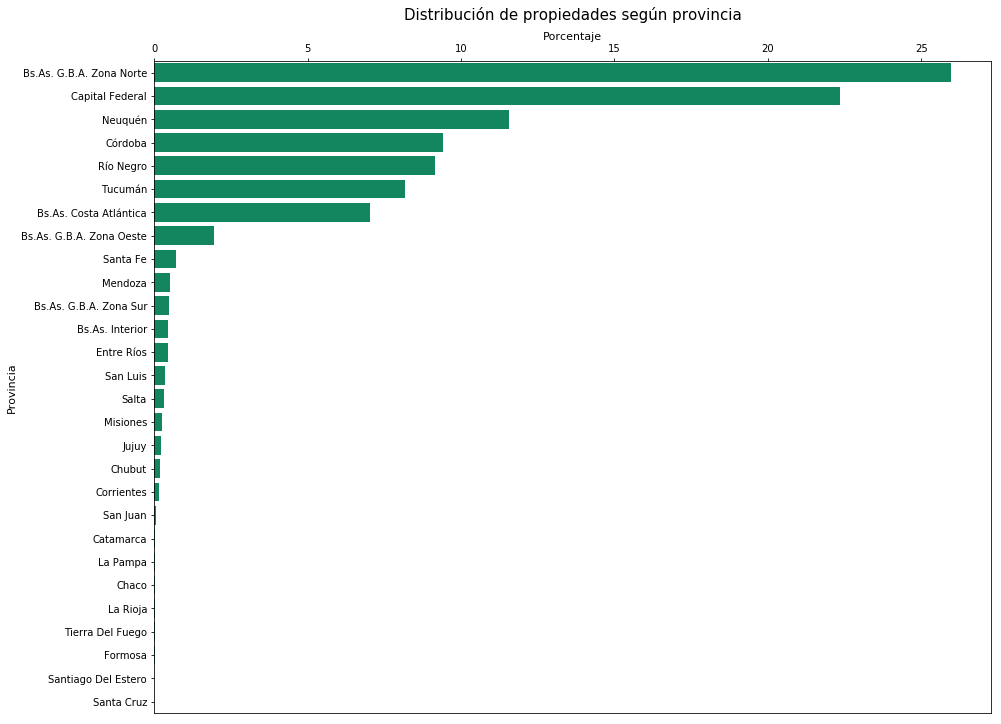

In [24]:
patternBsAs = re.compile("Buenos Aires\s*")
data['provincia'] = data['provincia'].apply(lambda x: patternBsAs.sub('Bs.As. ', x))

f, ax = plt.subplots()
f.set_figwidth(15)
f.set_figheight(12)
sns.barplot((data['provincia'].value_counts()/data['provincia'].shape[0])*100,data['provincia'].unique(), ax=ax , color = "#009966", orient="h")
plt.title("Distribución de propiedades según provincia\n\n",fontsize=15)
plt.xlabel("Porcentaje",fontsize=11)
ax.xaxis.set_label_position('top') 
plt.ylabel("Provincia",fontsize=11)
ax.xaxis.tick_top()

---
<b><a id='section_2_3'>2.3. Columnas 'price','currency','price_aprox_local_currency' y 'price_aprox_usd' </a>  </b>

Análisis de valores y nulos

In [25]:
data_describe.loc[data_describe.index.isin(['price','currency','price_aprox_local_currency','price_aprox_usd']),:]

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
price,float64,0.17,20410,9747,"[62000.0, 150000.0, 72000.0, 95000.0, 64000.0,..."
currency,object,0.17,20411,5,"[USD, nan, ARS, PEN, UYU]"
price_aprox_local_currency,float64,0.17,20410,10365,"[1093959.0, 2646675.0, 1270404.0, 1676227.5, 1..."
price_aprox_usd,float64,0.17,20410,10365,"[62000.0, 150000.0, 72000.0, 95000.0, 64000.0,..."


In [26]:
maskNull_priceAndCurrency = data['price'].isnull() & data['currency'].isnull() &\
                            data['price_aprox_local_currency'].isnull() &\
                            data['price_aprox_usd'].isnull()

print("Cantidad de nulos que coinciden:",maskNull_priceAndCurrency.value_counts()[True],"de 20411")

Cantidad de nulos que coinciden: 15296 de 20411


In [27]:
data.loc[data['currency'].isnull() & data['price'].notnull() ,['price','currency','price_aprox_local_currency','price_aprox_usd']]

,price,currency,price_aprox_local_currency,price_aprox_usd
101219,0.0,NaN,0.0,0.0


Detectamos que <u>los nulos de las columnas  'price','currency','price_aprox_local_currency' y 'price_aprox_usd' coinciden</u>  
Existe un solo nulo adicional en la columna 'currency' en el cual el resto toma valor 0. Se decide reemplazar esos 0 por NaN

In [28]:
data[['price_clean', 'price_aprox_local_currency_clean','price_aprox_usd_clean']]=data[['price','price_aprox_local_currency','price_aprox_usd']]

In [29]:
data.loc[data['currency'].isnull(),['price_clean', 'price_aprox_local_currency_clean','price_aprox_usd_clean']] = np.NaN
data.loc[9761,['price_clean', 'currency', 'price_aprox_local_currency_clean','price_aprox_usd_clean']]

price_clean                              185000
currency                                    USD
price_aprox_local_currency_clean    3.26423e+06
price_aprox_usd_clean                    185000
Name: 9761, dtype: object

Para la propiedades que tienen 'price' expresado en USD, imputamos estos valores en la columna 'price_aprox_usd_clean'

In [30]:
maskUSD = data['currency'] == "USD"
data.loc[maskUSD, 'price_aprox_usd_clean'] = data.loc[maskUSD, 'price']

Visualización

Text(0,0.5,'Porcentaje')

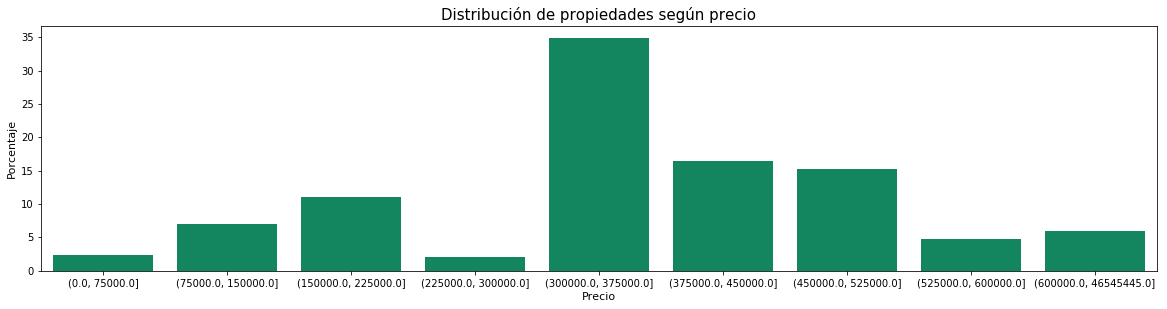

In [31]:
maskNotNull_price= data['price_aprox_usd_clean'].notnull()
precioMaximo=data['price_aprox_usd_clean'].max()
bins= [0,75000,150000,225000,300000,375000,450000, 525000, 600000, precioMaximo]

dist = pd.cut(data.loc[maskNotNull_price, 'price_aprox_usd_clean'], bins) 

f, ax = plt.subplots()
f.set_figwidth(20)
f.set_figheight(4.5)
sns.barplot(dist.unique(),(dist.value_counts()/data.loc[maskNotNull_price, 'price_aprox_usd_clean'].shape[0])*100,ax=ax , color = "#009966")
plt.title("Distribución de propiedades según precio",fontsize=15)
plt.xlabel("Precio",fontsize=11)
plt.ylabel("Porcentaje",fontsize=11)

Análisis de outliers.   
  
Debido a que pueden existir significativas diferencias de valor entre las propiedades según el tipo de propiedad y la ciudad donde se ubican, se calculan valores límites para determinar outliers a partir de estas variables. Esta consideración es tenida en cuenta en todos los procesos de "Análisis de outliers"

In [32]:
data['outliers_Price'] = None
data['ciudad_sinNulos'] = data['ciudad'].fillna("-")
data['auxiliar_Outliers'] = data['property_type']+data['provincia']+data['ciudad_sinNulos']
for i in data['auxiliar_Outliers'].unique():
    rangoInterquartil_price= data.loc[data['auxiliar_Outliers']==i,'price_aprox_usd_clean'].quantile(0.75) - data.loc[data['auxiliar_Outliers']==i,'price_aprox_usd_clean'].quantile(0.25)
    umbral_lower_Price = data.loc[data['auxiliar_Outliers']==i,'price_aprox_usd_clean'].quantile(0.25) - rangoInterquartil_price*1.5
    umbral_upper_Price = data.loc[data['auxiliar_Outliers']==i,'price_aprox_usd_clean'].quantile(0.75) + rangoInterquartil_price*1.5


    data.loc[maskNotNull_price & (data['auxiliar_Outliers']==i), 'outliers_Price']= data.loc[maskNotNull_price & (data['auxiliar_Outliers']==i), 'price_aprox_usd_clean'].apply\
                                                                                    (lambda x: "Outlier superior" if x >umbral_upper_Price else(
                                                                                 "Outlier inferior" if x<umbral_lower_Price else 
                                                                                 "No es outlier"))

outliers_Price = data['outliers_Price']
data = data.drop(columns = ['outliers_Price','ciudad_sinNulos'])
pd.DataFrame(round((outliers_Price.value_counts() / outliers_Price[maskNotNull_price].shape[0])*100,1))

,outliers_Price
No es outlier,93.3
Outlier superior,6.7
Outlier inferior,0.0


Se reemplaza a los outliers por nulos

In [33]:
maskOutliers= outliers_Price !="No es outlier"
data.loc[maskOutliers,'price_aprox_usd_clean'] = np.NaN

Visualización sin outliers

Text(0,0.5,'Porcentaje')

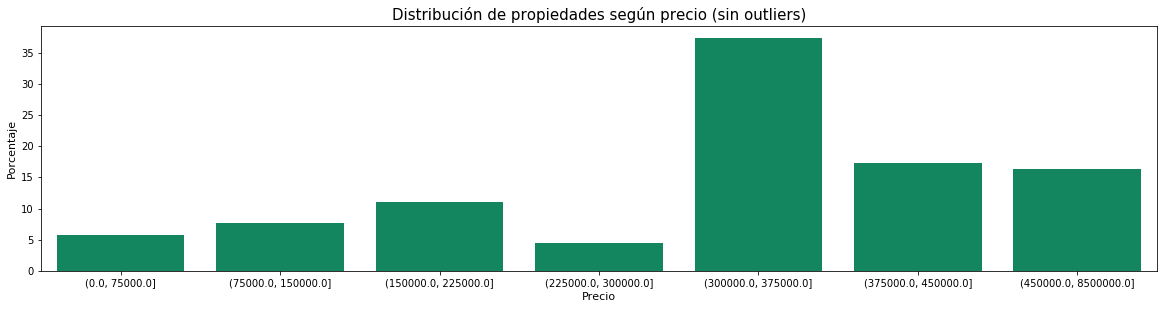

In [34]:
maskNotNull_price= data['price_aprox_usd_clean'].notnull()
precioMaximo=data['price_aprox_usd_clean'].max()
bins= [0,75000,150000,225000,300000,375000,450000, precioMaximo]

dist = pd.cut(data.loc[maskNotNull_price, 'price_aprox_usd_clean'], bins) 

f, ax = plt.subplots()
f.set_figwidth(20)
f.set_figheight(4.5)
sns.barplot(dist.unique(),(dist.value_counts()/data.loc[maskNotNull_price, 'price_aprox_usd_clean'].shape[0])*100,ax=ax , color = "#009966")
plt.title("Distribución de propiedades según precio (sin outliers)",fontsize=15)
plt.xlabel("Precio",fontsize=11)
plt.ylabel("Porcentaje",fontsize=11)

Text(0,0.5,'Precio')

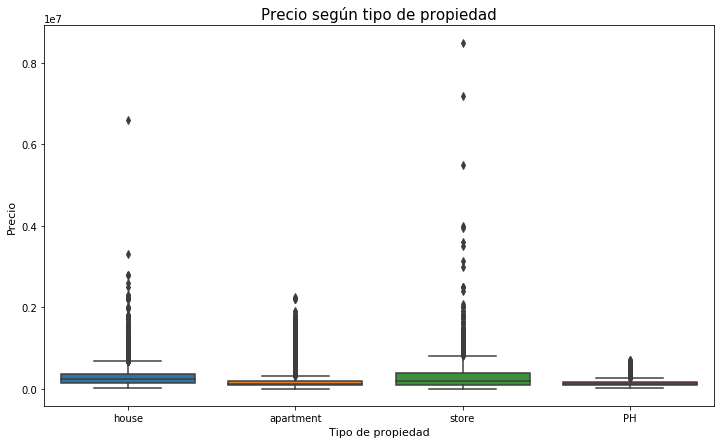

In [35]:
maskNotNull_Rooms = data['price_aprox_usd_clean'].notnull()
f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(7)
sns.boxplot(x=data.loc[maskNotNull_Rooms,'property_type'],y=data.loc[maskNotNull_Rooms,'price_aprox_usd_clean'])
plt.title("Precio según tipo de propiedad",fontsize=15)
plt.xlabel("Tipo de propiedad",fontsize=11)
plt.ylabel("Precio",fontsize=11)

---
<b><a id='section_2_4'>2.4. Columna 'rooms'</a>  </b>

In [36]:
data['rooms_clean'] = data['rooms']

Análisis de nulos y valores

In [37]:
data_describe.loc[data_describe.index.isin(['rooms']),:]

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
rooms,float64,0.61,73830,32,"[nan, 1.0, 4.0, 3.0, 2.0, 6.0, 5.0, 10.0, 7.0,..."


Completamos los nulos de la columna 'rooms' con datos extraidos de la columna 'descripcion' y 'title'

In [38]:
#Primer pattern
regexAmbientes = re.compile('(?P<numero>\d{1})\s?(amb)')

#Regex en la columna 'descripcion'
MatchsAmbientes = data['description_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes.search(x))
maskRooms_NullsAndMatch = data['rooms'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: float(x.group("numero")))
#Regex en la columna 'title'
MatchsAmbientes = data['title_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: float(x.group("numero")))

In [39]:
#Segundo pattern
regexAmbientes2 = re.compile('(?P<numeroPalabra>uno|un|dos|tres|cuatro|cinco|seis|siete|ocho)\s?(amb)')

#Definimos una función para transformar el match obtenido en el search en un número
def MatchToNumber(x):
    numeroStr = x.group("numeroPalabra")
    dictAmbientes = {'un': 1, 'uno':1,'dos':2, 'tres':3, 'cuatro':4, 'cinco': 5, 'seis': 6, 'seís':6, 'siete': 7, 'ocho': 8, 'nueve': 9}
    resultado = dictAmbientes[numeroStr]
    return resultado

#Regex en la columna 'descripcion'
MatchsAmbientes = data['description_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes2.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(MatchToNumber)

#Regex en la columna 'title'
MatchsAmbientes = data['title_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes2.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(MatchToNumber)

In [40]:
#Tercer pattern
regexAmbientes3 = re.compile('(?P<numero>\d{1})\s?(dorm|cuarto|hab)')
#Debido a que este Pattern considera únicamente dormitorios/habitaciones, se le agrega 1 habitación a todos los matchs

#Regex en la columna 'descripcion'
MatchsAmbientes = data['description_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes3.search(x))
maskRooms_NullsAndMatch = data['rooms'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: float(x.group("numero"))+1)
#Regex en la columna 'title'
MatchsAmbientes = data['title_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes3.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: float(x.group("numero"))+1)


In [41]:
#Cuarto pattern
regexAmbientes4 = re.compile('(?P<numeroPalabra>un|1|mono)\s?(amb)')

#Regex en la columna 'descripcion'
MatchsAmbientes = data['description_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes4.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: float(1.0))

#Regex en la columna 'title'
MatchsAmbientes = data['title_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes4.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: float(1.0))

In [42]:
#Quinto pattern
regexAmbientes5 = re.compile('(?P<numeroPalabra>un|dos|tres|cuatro|cinco|seis|siete|ocho)\s?(dorm|cuarto|hab)')
#Debido a que este Pattern considera únicamente dormitorios/habitaciones, se le agrega 1 habitación a todos los matchs

#Regex en la columna 'descripcion'
MatchsAmbientes = data['description_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes5.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: MatchToNumber(x)+1)

#Regex en la columna 'title'
MatchsAmbientes = data['title_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes5.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: MatchToNumber(x)+1)

In [43]:
print("Columna 'rooms'")
print("Cantidad de nulos antes del regex:", data['rooms'].isnull().sum(), "("+str(round((data['rooms'].isnull().sum()/data.shape[0])*100,1))+"%)")
print("Cantidad de nulos después del regex:", data['rooms_clean'].isnull().sum(),"("+str(round((data['rooms_clean'].isnull().sum()/data.shape[0])*100,1))+"%)")

Columna 'rooms'
Cantidad de nulos antes del regex: 59344 (58.1%)
Cantidad de nulos después del regex: 11189 (11.0%)


Visualización

Text(0,0.5,'Cuartos')

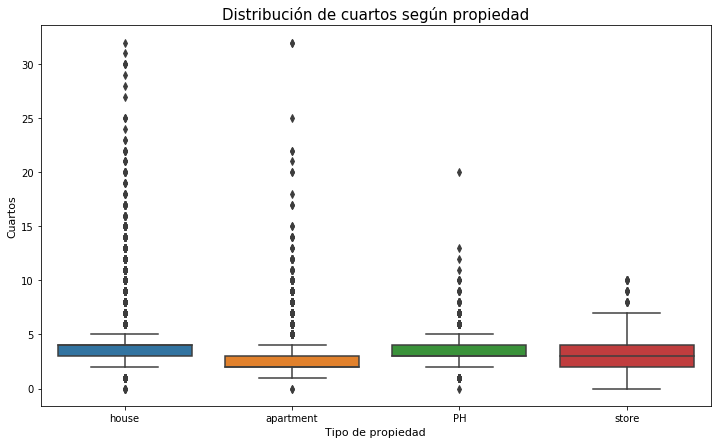

In [44]:
maskNotNull_Rooms = data['rooms_clean'].notnull()
f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(7)
sns.boxplot(x=data.loc[maskNotNull_Rooms,'property_type'],y=data.loc[maskNotNull_Rooms,'rooms_clean'])
plt.title("Distribución de cuartos según propiedad",fontsize=15)
plt.xlabel("Tipo de propiedad",fontsize=11)
plt.ylabel("Cuartos",fontsize=11)

Análisis de outliers

In [45]:
data['outliers_rooms'] = None
for i in data['property_type'].unique():
    rangoInterquartil_rooms= data.loc[data['property_type']==i,'rooms_clean'].quantile(0.75) - data.loc[data['property_type']==i,'rooms_clean'].quantile(0.25)
    umbral_lower_rooms = data.loc[data['property_type']==i,'rooms_clean'].quantile(0.25) - rangoInterquartil_rooms*1.5
    umbral_upper_rooms = data.loc[data['property_type']==i,'rooms_clean'].quantile(0.75) + rangoInterquartil_rooms*1.5


    data.loc[maskNotNull_Rooms & (data['property_type']==i), 'outliers_rooms']= data.loc[maskNotNull_Rooms & (data['property_type']==i), 'rooms_clean'].apply\
                                                                                    (lambda x: "Outlier superior" if x >umbral_upper_rooms else(
                                                                                 "Outlier inferior" if x<umbral_lower_rooms else 
                                                                                 "No es outlier"))

outliers_rooms = data['outliers_rooms']
data = data.drop(columns = ['outliers_rooms'])
pd.DataFrame(round((outliers_rooms.value_counts() / outliers_rooms[maskNotNull_Rooms].shape[0])*100,1))

,outliers_rooms
No es outlier,93.4
Outlier superior,6.0
Outlier inferior,0.6


Se reemplaza a los outliers por nulos

In [46]:
maskOutliers= outliers_rooms !="No es outlier"
data.loc[maskOutliers,'rooms_clean'] = np.NaN

Le imputamos a los datos que los nulos el valor promedio de cuartos según su tipo de propiedad.
Los nulos proveniente de los outliers quedan nulos

In [47]:
maskOldNulls = maskNotNull_Rooms ==False 

In [48]:
meanByProperty_rooms = pd.DataFrame(data.groupby('property_type')['rooms_clean'].mean())
meanByProperty_rooms.columns = ['rooms_clean_mean']
meanByProperty_rooms['rooms_clean_mean'] = meanByProperty_rooms['rooms_clean_mean'].apply(lambda x: math.floor(x))
meanByProperty_rooms.sort_values(by = 'rooms_clean_mean', ascending=False)

,rooms_clean_mean
property_type,
PH,3
house,3
apartment,2
store,2


In [49]:
data= data.merge(meanByProperty_rooms, on='property_type')

In [50]:
data.loc[maskOldNulls,'rooms_clean'] = data.loc[maskOldNulls,'rooms_clean_mean'] 
data = data.drop(columns=['rooms_clean_mean'])

Visualización sin outliers

Text(0,0.5,'Cuartos')

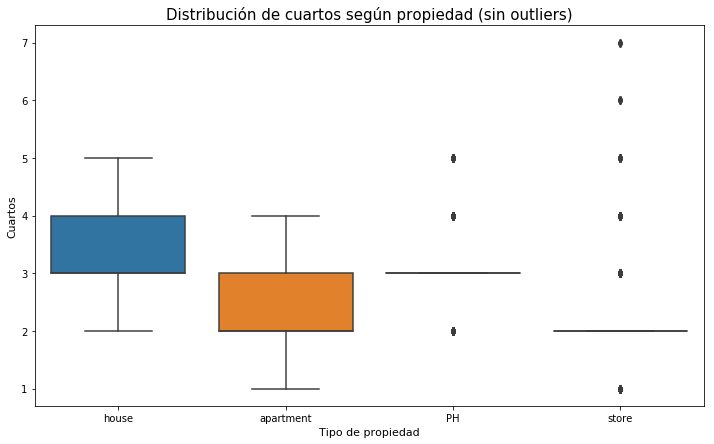

In [51]:
f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(7)
sns.boxplot(x=data['property_type'],y=data['rooms_clean'])
plt.title("Distribución de cuartos según propiedad (sin outliers)",fontsize=15)
plt.xlabel("Tipo de propiedad",fontsize=11)
plt.ylabel("Cuartos",fontsize=11)

---
<b><a id='section_2_5'>2.5. Columna 'floor'</a> </b>

In [52]:
data['floor_clean'] = data['floor']

Análisis de nulos y valores

In [53]:
data_describe.loc[data_describe.index.isin(['floor']),:]

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
floor,float64,0.93,113321,183,"[nan, 5.0, 1.0, 2.0, 3.0, 12.0, 6.0, 4.0, 7.0,..."


In [54]:
print("Campos con información en la columna 'floor' según tipo de propiedad")
pd.DataFrame(data.groupby('property_type')['floor'].apply(lambda x: x.notnull().sum()))

Campos con información en la columna 'floor' según tipo de propiedad


,floor
property_type,
PH,385
apartment,5589
house,624
store,39


Se decide contemplar la variable 'floor' únicamente para los departamentos. Se le imputa valor nulo a los otros tipo de propiedad

In [55]:
maskNotApartment = data['property_type'] != 'apartment'
data.loc[maskNotApartment, 'floor_clean'] = np.NaN
pd.DataFrame(data.groupby('property_type')['floor_clean'].apply(lambda x: x.notnull().sum()))

,floor_clean
property_type,
PH,0
apartment,5589
house,0
store,0


Completamos los nulos de la columna 'floor_clean' con datos extraidos de la columna 'descripcion' y 'title'

In [56]:
maskApartment = data['property_type'] == 'apartment'

In [57]:
#Primer pattern
regexFloor = re.compile('(?P<numeroPiso>\d\d?)\s?(^er|er|do|to|mo|ro|avo|vo|no)')

#Regex en la columna 'descripcion'
MatchsFloor = data['description_lower'].apply(lambda x: x if x is np.NaN else regexFloor.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(x.group("numeroPiso")))

#Regex en la columna 'title'
MatchsFloor = data['title_lower'].apply(lambda x: x if x is np.NaN else regexFloor.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(x.group("numeroPiso")))

In [58]:
#Segundo pattern
regexFloor2 = re.compile('(?P<numeroPiso>\d\d?)\s?\º?\s?(piso)')

#Regex en la columna 'descripcion'
MatchsFloor = data['description_lower'].apply(lambda x: x if x is np.NaN else regexFloor2.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(x.group("numeroPiso")))

#Regex en la columna 'title'
MatchsFloor = data['title_lower'].apply(lambda x: x if x is np.NaN else regexFloor2.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(x.group("numeroPiso")))

In [59]:
#Tercer pattern
regexFloor3 = re.compile('(piso)\s?(?P<numeroPiso>\d\d?)')

#Regex en la columna 'descripcion'
MatchsFloor = data['description_lower'].apply(lambda x: x if x is np.NaN else regexFloor3.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(x.group("numeroPiso")))

#Regex en la columna 'title'
MatchsFloor = data['title_lower'].apply(lambda x: x if x is np.NaN else regexFloor3.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(x.group("numeroPiso")))

In [60]:
#Cuarto pattern
regexFloor3 = re.compile('pb|plantabaja|planta baja')

#Regex en la columna 'descripcion'
MatchsFloor = data['description_lower'].apply(lambda x: x if x is np.NaN else regexFloor3.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(0))

#Regex en la columna 'title'
MatchsFloor = data['title_lower'].apply(lambda x: x if x is np.NaN else regexFloor3.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(0))

In [61]:
data['floor_clean'] = data['floor_clean'].astype(float)

In [62]:
print("Columna 'floor'")
print("Cantidad de nulos antes del regex:", data.loc[maskApartment,'floor'].isnull().sum(), "("+str(round((data.loc[maskApartment,'floor'].isnull().sum()/data.loc[maskApartment,:].shape[0])*100,1))+"%)")
print("Cantidad de nulos después del regex:", data.loc[maskApartment,'floor_clean'].isnull().sum(),"("+str(round((data.loc[maskApartment,'floor_clean'].isnull().sum()/data.loc[maskApartment,:].shape[0])*100,1))+"%)")

Columna 'floor'
Cantidad de nulos antes del regex: 49541 (89.9%)
Cantidad de nulos después del regex: 23149 (42.0%)


Visualización

Text(0,0.5,'Pisos')

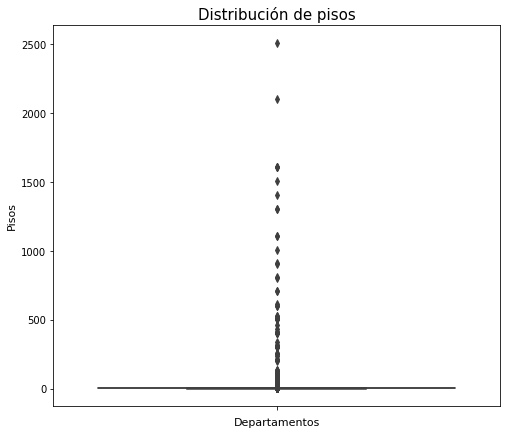

In [63]:
maskNotNull_Floor = data['floor_clean'].notnull()
f, ax = plt.subplots()
f.set_figwidth(8)
f.set_figheight(7)
sns.boxplot(y=data.loc[maskNotNull_Floor,'floor_clean'])
plt.title("Distribución de pisos",fontsize=15)
plt.xlabel("Departamentos",fontsize=11)
plt.ylabel("Pisos",fontsize=11)

Análisis de outliers. Se consideran nulos a los pisos superiores a 20.

In [64]:
maskOutliers = data['floor_clean'] > 20
maskOutliers.value_counts()

False    100946
True       1208
Name: floor_clean, dtype: int64

Se reemplaza los outliers por nulos

In [65]:
maskOutliers = data['floor_clean'] > 20
data.loc[maskOutliers,'floor_clean'] = np.NaN

Visualización sin outliers

Text(0,0.5,'Pisos')

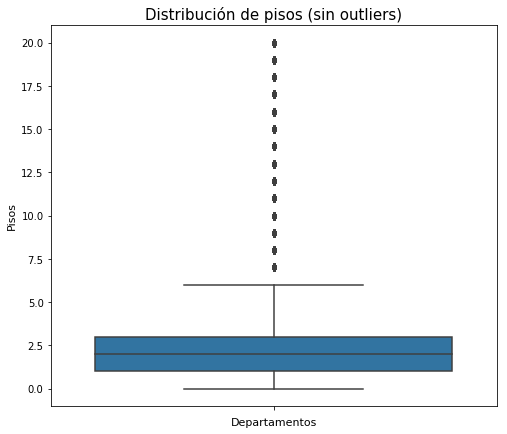

In [66]:
f, ax = plt.subplots()
f.set_figwidth(8)
f.set_figheight(7)
sns.boxplot(y=data['floor_clean'])
plt.title("Distribución de pisos (sin outliers)",fontsize=15)
plt.xlabel("Departamentos",fontsize=11)
plt.ylabel("Pisos",fontsize=11)

---
<b><a id='section_2_6'>2.6. Columnas 'surface_total_in_m2' y 'surface_covered_in_m2'</a> </b>

In [67]:
data['surface_total_in_m2_clean'] = data['surface_total_in_m2']

Análisis de nulos y valores

In [68]:
data_describe.loc[data_describe.index.isin(['surface_covered_in_m2','surface_total_in_m2']),:]

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
surface_total_in_m2,float64,0.32,39328,1688,"[55.0, nan, 35.0, 53.0, 106.0, 45.0, 65.0, 151..."
surface_covered_in_m2,float64,0.16,19907,996,"[40.0, nan, 55.0, 35.0, 78.0, 60.0, 36.0, 30.0..."


In [69]:
maskNull_coveredAndTotal = data['surface_covered_in_m2'].isnull() & data['surface_total_in_m2'].isnull()
print("Cantidad de nulos que coinciden:",maskNull_coveredAndTotal.value_counts()[True])

Cantidad de nulos que coinciden: 9521


Se opta por completar la columna 'surface_total_in_m2' mediante el siguiente proceso:  
1- Imputar datos de acuerdo a la proporción media entre  'surface_covered_in_m2'  y 'surface_total_in_m2'  
2- Completamos los nulos restantes con datos extraidos de la columna 'descripcion' y 'title'

In [70]:
maskNotNull_TotalAndCovered = data['surface_covered_in_m2'].notnull() & data['surface_total_in_m2'].notnull()
data['covered_pct'] = data.loc[maskNotNull_TotalAndCovered, 'surface_covered_in_m2'] / data.loc[maskNotNull_TotalAndCovered, 'surface_total_in_m2'] 
data['covered_pct'] = data['covered_pct'].apply(lambda x: 1 if x>1 else x)
meanByProperty = pd.DataFrame(data.groupby('property_type')['covered_pct'].mean())
meanByProperty.columns = ['covered_pct_mean']
print("Las casas son las que menos metros cuadrados tienen cubierto")
meanByProperty.sort_values(by = 'covered_pct_mean', ascending=False)

Las casas son las que menos metros cuadrados tienen cubierto


,covered_pct_mean
property_type,
store,0.938959
apartment,0.887247
PH,0.808392
house,0.691308


In [71]:
data = data.merge(meanByProperty, on='property_type')

In [72]:
maskFill = data['surface_covered_in_m2'].notnull() & data['surface_total_in_m2'].isnull()
surface_total_parche = data.loc[maskFill,'surface_covered_in_m2'] / data.loc[maskFill,'covered_pct_mean']
data.loc[maskFill, 'surface_total_in_m2_clean'] = surface_total_parche[maskFill] 

In [73]:
print("Columna 'surface_total_in_m2'")
print("Cantidad de nulos antes de la imputación:", data['surface_total_in_m2'].isnull().sum(), "("+str(round((data['surface_total_in_m2'].isnull().sum()/data.shape[0])*100,1))+"%)")
print("Cantidad de nulos después de la imputación:", data['surface_total_in_m2_clean'].isnull().sum(),"("+str(round((data['surface_total_in_m2_clean'].isnull().sum()/data.shape[0])*100,1))+"%)")

Columna 'surface_total_in_m2'
Cantidad de nulos antes de la imputación: 33439 (32.7%)
Cantidad de nulos después de la imputación: 9521 (9.3%)


In [74]:
#Pattern
regexSurface = re.compile('(?P<mts2>\d\d?\d?\d?)\s?(?P<metros>mts|mt|metros|mt2|m2|m|mts2|m2c|mÂ²|mts²)')

#Regex en la columna 'descripcion'
MatchsSurface = data['description_lower'].apply(lambda x: x if x is np.NaN else regexSurface.search(x))
maskSurface_NullsAndMatch = data['surface_total_in_m2_clean'].isnull() & MatchsSurface.notnull()
data.loc[maskSurface_NullsAndMatch, 'surface_total_in_m2_clean'] = MatchsSurface[maskSurface_NullsAndMatch].apply(lambda x: float(x.group("mts2")))

#Regex en la columna 'title'
MatchsSurface = data['title_lower'].apply(lambda x: x if x is np.NaN else regexSurface.search(x))
maskSurface_NullsAndMatch = data['surface_total_in_m2_clean'].isnull() & MatchsSurface.notnull()
data.loc[maskSurface_NullsAndMatch, 'surface_total_in_m2_clean'] = MatchsSurface[maskSurface_NullsAndMatch].apply(lambda x: float(x.group("mts2")))

Se considera que una propiedad no puede tener menos de 20 mts cuadrados

In [75]:
data['surface_total_in_m2_clean'] = data['surface_total_in_m2_clean'].apply(lambda x: np.NaN if x < 20 else x)

In [76]:
print("Columna 'surface_total_in_m2'")
print("Cantidad de nulos antes del regex:", data['surface_total_in_m2'].isnull().sum(), "("+str(round((data['surface_total_in_m2'].isnull().sum()/data.shape[0])*100,1))+"%)")
print("Cantidad de nulos después del regex:", data['surface_total_in_m2_clean'].isnull().sum(),"("+str(round((data['surface_total_in_m2_clean'].isnull().sum()/data.shape[0])*100,1))+"%)")

Columna 'surface_total_in_m2'
Cantidad de nulos antes del regex: 33439 (32.7%)
Cantidad de nulos después del regex: 7298 (7.1%)


Visualización

Text(0,0.5,'Metros cuadrados')

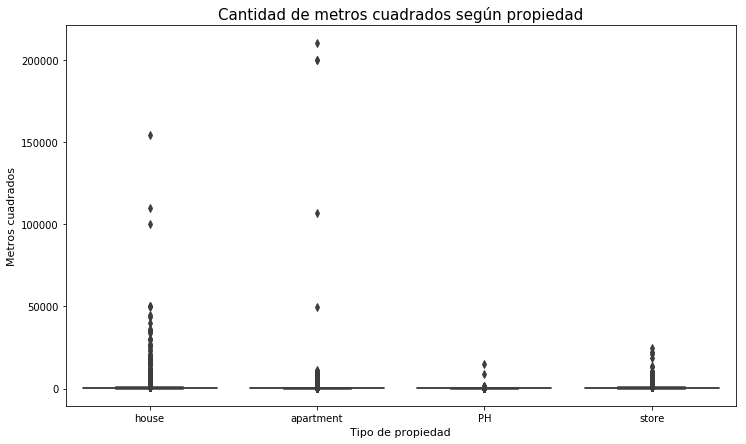

In [77]:
maskNotNull_Surface = data['surface_total_in_m2_clean'].notnull()
f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(7)
sns.boxplot(x=data.loc[maskNotNull_Rooms,'property_type'],y=data.loc[maskNotNull_Rooms,'surface_total_in_m2_clean'])
plt.title("Cantidad de metros cuadrados según propiedad",fontsize=15)
plt.xlabel("Tipo de propiedad",fontsize=11)
plt.ylabel("Metros cuadrados",fontsize=11)

Análisis de outliers.  

In [78]:
data['outliers_Surface'] = None
for i in data['property_type'].unique():
    rangoInterquartil_Surface= data.loc[data['property_type']==i,'surface_total_in_m2_clean'].quantile(0.75) - data.loc[data['property_type']==i,'surface_total_in_m2_clean'].quantile(0.25)
    umbral_lower_Surface = data.loc[data['property_type']==i,'surface_total_in_m2_clean'].quantile(0.25) - rangoInterquartil_Surface*1.5
    umbral_upper_Surface = data.loc[data['property_type']==i,'surface_total_in_m2_clean'].quantile(0.75) + rangoInterquartil_Surface*1.5


    data.loc[maskNotNull_Surface & (data['property_type']==i), 'outliers_Surface']= data.loc[maskNotNull_Surface & (data['property_type']==i), 'surface_total_in_m2_clean'].apply\
                                                                                    (lambda x: "Outlier superior" if x >umbral_upper_Surface else(
                                                                                 "Outlier inferior" if x<umbral_lower_Surface else 
                                                                                 "No es outlier"))

outliers_Surface = data['outliers_Surface']
data = data.drop(columns = ['outliers_Surface'])
pd.DataFrame(round((outliers_Surface.value_counts() / outliers_Surface[maskNotNull_Surface].shape[0])*100,1))

,outliers_Surface
No es outlier,91.9
Outlier superior,8.1


Se reemplaza a los outliers por nulos

In [79]:
maskOutliers= outliers_Surface !="No es outlier"
data.loc[maskOutliers,'surface_total_in_m2_clean'] = np.NaN

Visualización sin outliers

Text(0,0.5,'Metros cuadrados')

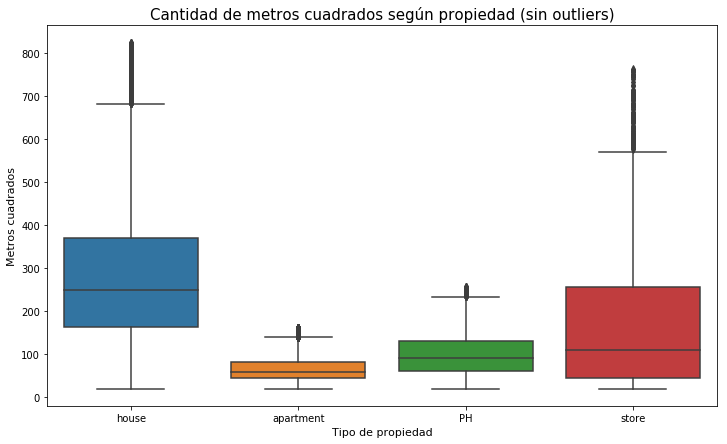

In [80]:
f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(7)

sns.boxplot(x=data['property_type'],y=data['surface_total_in_m2_clean'])
plt.title("Cantidad de metros cuadrados según propiedad (sin outliers)",fontsize=15)
plt.xlabel("Tipo de propiedad",fontsize=11)
plt.ylabel("Metros cuadrados",fontsize=11)

---
<b><a id='section_2_7'>2.7. Columna 'price_usd_per_m2'</a> </b>

Análisis de nulos y valores

In [81]:
data_describe.loc[data_describe.index.isin(['price_usd_per_m2']),:]

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
price_usd_per_m2,float64,0.43,52603,25568,"[1127.2727272727273, nan, 1309.090909090909, 1..."


Se reemplaza la columna 'price_usd_per_m2' por el cociente de las columnas 'price_aprox_usd_clean' y 'surface_total_in_m2_clean' para que sea consistente con los cambios realizados

In [82]:
maskNotNull = data['price_aprox_usd_clean'].notnull() & data['surface_total_in_m2_clean'].notnull()
data['price_usd_per_m2_clean'] = (data.loc[maskNotNull, 'price_aprox_usd_clean'] / data.loc[maskNotNull, 'surface_total_in_m2_clean']).round(0)

Visualización

Text(0,0.5,'Precio por metro cuadrado')

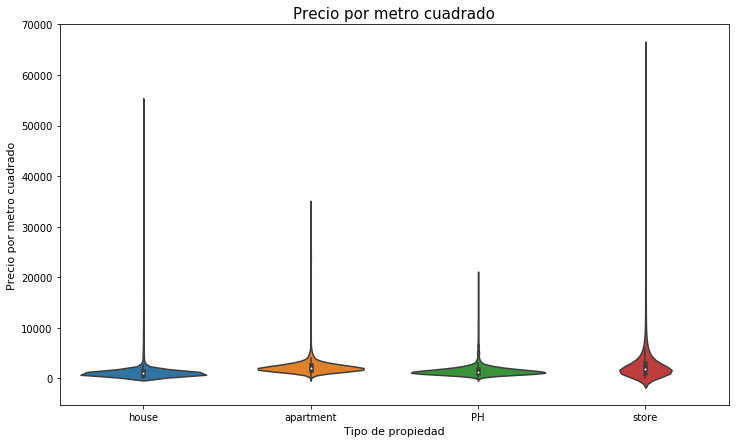

In [83]:
f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(7)
sns.violinplot(data['property_type'], data['price_usd_per_m2_clean'])
plt.title("Precio por metro cuadrado",fontsize=15)
plt.xlabel("Tipo de propiedad",fontsize=11)
plt.ylabel("Precio por metro cuadrado",fontsize=11)

Análisis de outliers

In [84]:
maskNotNull_pricexmt2 = data['price_usd_per_m2_clean'].notnull()
data['outliers_pricexmt2'] = None
for i in data['property_type'].unique():
    rangoInterquartil_pricexmt2= data.loc[data['property_type']==i,'price_usd_per_m2_clean'].quantile(0.75) - data.loc[data['property_type']==i,'price_usd_per_m2_clean'].quantile(0.25)
    umbral_lower_pricexmt2 = data.loc[data['property_type']==i,'price_usd_per_m2_clean'].quantile(0.25) - rangoInterquartil_pricexmt2*1.5
    umbral_upper_pricexmt2 = data.loc[data['property_type']==i,'price_usd_per_m2_clean'].quantile(0.75) + rangoInterquartil_pricexmt2*1.5


    data.loc[maskNotNull_pricexmt2 & (data['property_type']==i), 'outliers_pricexmt2']= data.loc[maskNotNull_pricexmt2 & (data['property_type']==i), 'price_usd_per_m2_clean'].apply\
                                                                                    (lambda x: "Outlier superior" if x >umbral_upper_pricexmt2 else(
                                                                                 "Outlier inferior" if x<umbral_lower_pricexmt2 else 
                                                                                 "No es outlier"))

outliers_pricexmt2 = data['outliers_pricexmt2']
data = data.drop(columns = ['outliers_pricexmt2'])
pd.DataFrame(round((outliers_pricexmt2.value_counts() / outliers_pricexmt2[maskNotNull_pricexmt2].shape[0])*100,1))

,outliers_pricexmt2
No es outlier,95.3
Outlier superior,4.7
Outlier inferior,0.0


Se reemplaza a los outliers por nulos

In [85]:
maskOutliers= outliers_pricexmt2 !="No es outlier"
data.loc[maskOutliers,'price_usd_per_m2_clean'] = np.NaN

Visualización sin outliers

Text(0,0.5,'Precio por metro cuadrado')

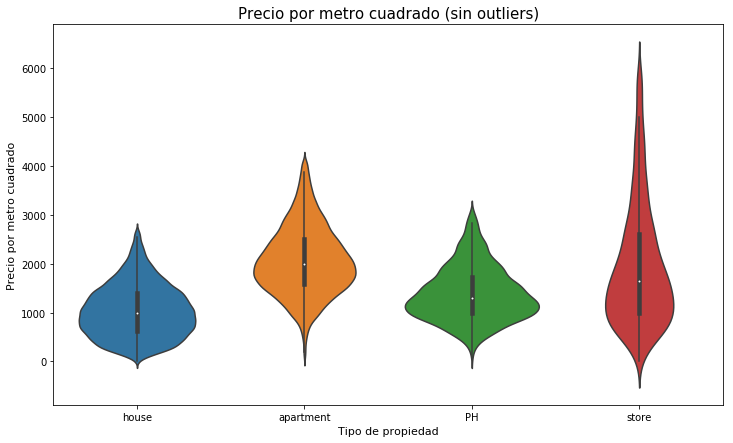

In [86]:
f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(7)
sns.violinplot(data['property_type'], data['price_usd_per_m2_clean'])
plt.title("Precio por metro cuadrado (sin outliers)",fontsize=15)
plt.xlabel("Tipo de propiedad",fontsize=11)
plt.ylabel("Precio por metro cuadrado",fontsize=11)

---
---

<b><a id='section_3'><h4>3. Nuevas variables</h4></a></b>
<a href='#section_3_1'>3.1. Pileta</a>  
<a href='#section_3_2'>3.2. Cochera  </a>  
<a href='#section_3_3'>3.3. Barrio cerrado</a>  
<a href='#section_3_4'>3.4. Jacuzzi  </a>  
<a href='#section_3_5'>3.5. Terraza  </a>  
<a href='#section_3_6'>3.6. Quincho  </a>  
<a href='#section_3_67'>3.7. Gimnasio  </a>  

Definimos una función para graficar los patrones encontrados

In [87]:
data['decil'] = pd.qcut(data['price_aprox_usd_clean'],10,labels=[1,2,3,4,5,6,7,8,9,10])
def chart_type(y_value):
    chart_pattern = pd.DataFrame(data[y_value].value_counts())
    chart_pattern[y_value+" (%)"] = round(pd.DataFrame(data[y_value].value_counts())/data[y_value].shape[0]*100,2)
    
    chart_property = (data.groupby('property_type')[y_value].sum()/data.groupby('property_type')[y_value].count())*100
    chart_property = pd.DataFrame(round(chart_property,2))
    chart_property =chart_property.reset_index()
    
    chart_decil = (data.groupby('decil')[y_value].sum()/data.groupby('decil')[y_value].count())*100
    chart_decil = pd.DataFrame(round(chart_decil,2))
    chart_decil =chart_decil.reset_index()
    
    f, (ax1, ax2, ax3) = plt.subplots(1, 3)
    f.set_figwidth(12)
    f.set_figheight(4.5)
    
    ax1.pie(chart_pattern[y_value],labels=chart_pattern.index, autopct='%1.1f%%', shadow=True)  
    sns.barplot(x='property_type', y=y_value, data=chart_property, ax=ax2)
    sns.barplot(x='decil', y=y_value, data=chart_decil, color = "#009966", ax=ax3)
    
    plt.tight_layout()
    ax1.title.set_text("Patrones de \'"+y_value+"\' encontrados")
    ax2.title.set_text("Porcentaje de "+y_value+" por tipo de propiedad")
    ax3.title.set_text("Porcentaje de "+y_value+" según decil\ndel valor de la propiedad")
    return

---
<b><a id='section_3_1'>3.1. Pileta</a>  </b>

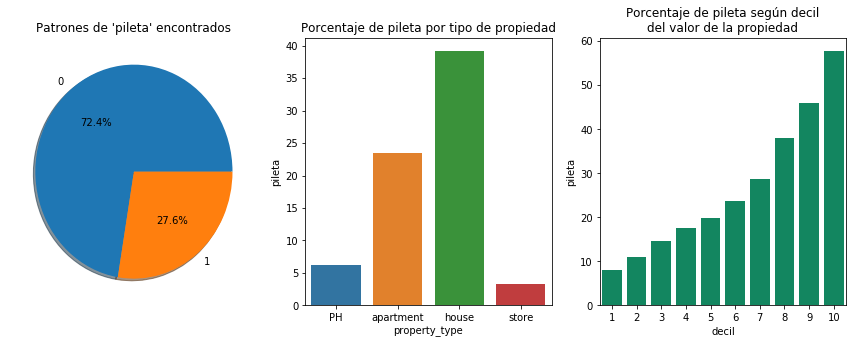

In [88]:
#Pattern
regexPileta = re.compile("(?P<pileta>pileta|picina|piscina|pisina)")

data['pileta'] = 0
#Regex en la columna 'descripcion'
MatchsPileta = data['description_lower'].apply(lambda x: x if x is np.NaN else regexPileta.search(x))
maskPileta_Match = MatchsPileta.notnull()
data.loc[maskPileta_Match, 'pileta'] = 1

#Regex en la columna 'title'
MatchsPileta = data['title_lower'].apply(lambda x: x if x is np.NaN else regexPileta.search(x))
maskPileta_Match = MatchsPileta.notnull()
data.loc[maskPileta_Match, 'pileta'] = 1

chart_type('pileta')

---
<b><a id='section_3_2'>3.2. Cochera</a>  </b>

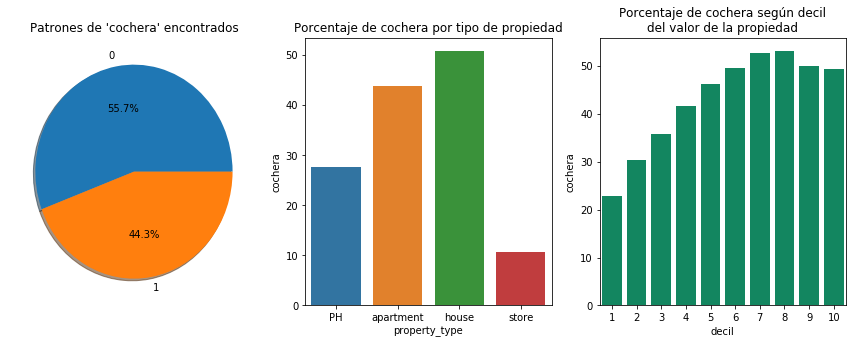

In [89]:
#Pattern
regexCochera = re.compile("(?P<cochera>cochera|garage|auto\s|automovil|vehiculo|\scoche\s|\scoches\s)")

data['cochera'] = 0
#Regex en la columna 'descripcion'
MatchsCochera = data['description_lower'].apply(lambda x: x if x is np.NaN else regexCochera.search(x))
maskCochera_Match = MatchsCochera.notnull()
data.loc[maskCochera_Match, 'cochera'] = 1

#Regex en la columna 'title'
MatchsCochera = data['title_lower'].apply(lambda x: x if x is np.NaN else regexCochera.search(x))
maskCochera_Match = MatchsCochera.notnull()
data.loc[maskCochera_Match, 'cochera'] = 1

chart_type('cochera')

---
<b><a id='section_3_3'>3.3. Barrio cerrado</a>  </b>

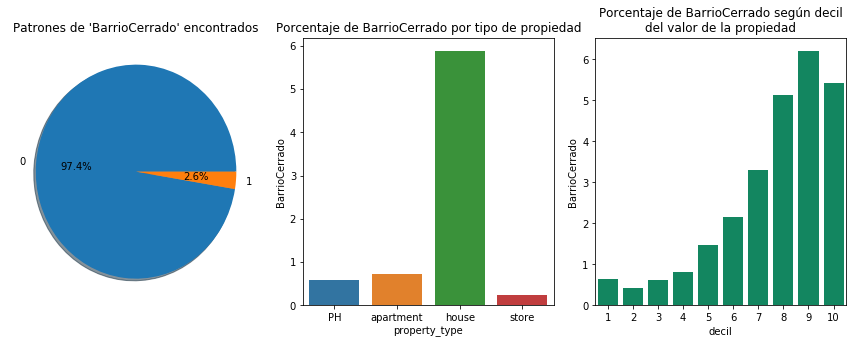

In [90]:
#Pattern
regexBarrioCerrado = re.compile("(?P<barrio>(barrio cerrado)|(barrio semicerrado)|(barrio semi cerrado)|country)")

data['BarrioCerrado'] = 0
#Regex en la columna 'descripcion'
MatchsBarrioCerrado = data['description_lower'].apply(lambda x: x if x is np.NaN else regexBarrioCerrado.search(x))
maskBarrioCerrado_Match = MatchsBarrioCerrado.notnull()
data.loc[maskBarrioCerrado_Match, 'BarrioCerrado'] = 1

#Regex en la columna 'title'
MatchsBarrioCerrado = data['title_lower'].apply(lambda x: x if x is np.NaN else regexBarrioCerrado.search(x))
maskBarrioCerrado_Match = MatchsBarrioCerrado.notnull()
data.loc[maskBarrioCerrado_Match, 'BarrioCerrado'] = 1

chart_type('BarrioCerrado')

---
<b><a id='section_3_4'>3.4. Jacuzzi</a>  </b>

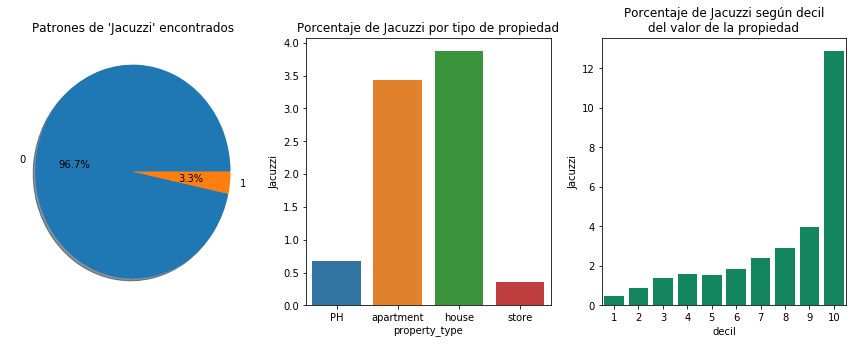

In [91]:
#Pattern
regexJacuzzi = re.compile("(?P<jacuzzi>(jacuzzi)|(suana)|(jacuzi))")

data['Jacuzzi'] = 0
#Regex en la columna 'descripcion'
MatchsJacuzzi = data['description_lower'].apply(lambda x: x if x is np.NaN else regexJacuzzi.search(x))
maskJacuzzi_Match = MatchsJacuzzi.notnull()
data.loc[maskJacuzzi_Match, 'Jacuzzi'] = 1

#Regex en la columna 'title'
MatchsJacuzzi = data['title_lower'].apply(lambda x: x if x is np.NaN else regexJacuzzi.search(x))
maskJacuzzi_Match = MatchsJacuzzi.notnull()
data.loc[maskJacuzzi_Match, 'Jacuzzi'] = 1

chart_type('Jacuzzi')

---
<b><a id='section_3_5'>3.5. Terraza</a>  </b>

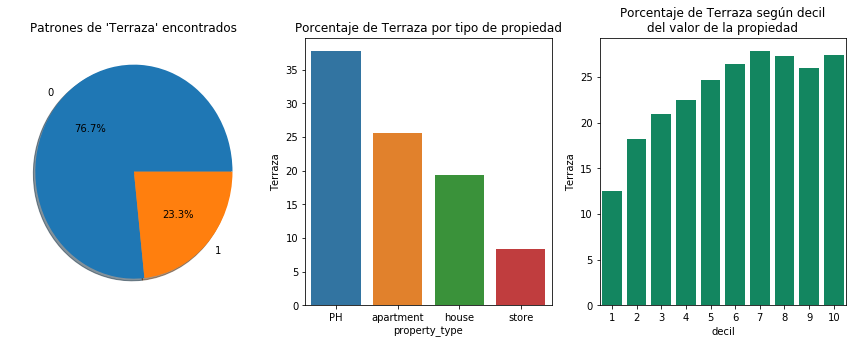

In [92]:
#Pattern
regexTerraza = re.compile("(?P<terraza>(terraza)|(terrasa)|(azotea)|(asotea))")

data['Terraza'] = 0
#Regex en la columna 'descripcion'
MatchsTerraza = data['description_lower'].apply(lambda x: x if x is np.NaN else regexTerraza.search(x))
maskTerraza_Match = MatchsTerraza.notnull()
data.loc[maskTerraza_Match, 'Terraza'] = 1

#Regex en la columna 'title'
MatchsTerraza = data['title_lower'].apply(lambda x: x if x is np.NaN else regexTerraza.search(x))
maskTerraza_Match = MatchsTerraza.notnull()
data.loc[maskTerraza_Match, 'Terraza'] = 1

chart_type('Terraza')

---
<b><a id='section_3_6'>3.6. Quincho</a>  </b>

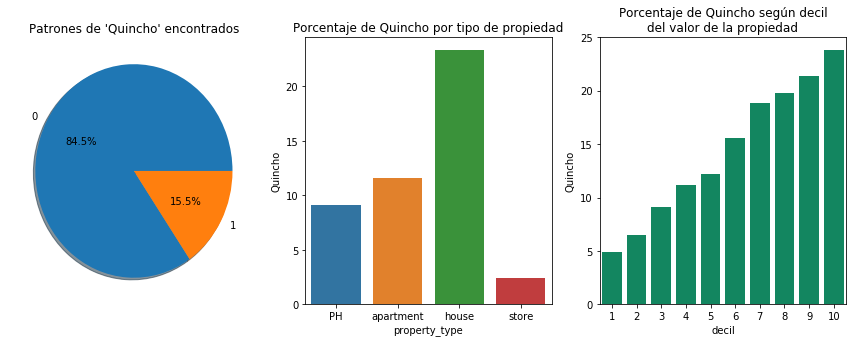

In [93]:
#Pattern
regexQuincho = re.compile("(?P<quincho>(quincho)|(kincho)|(qincho)|(\ssum\s)|(s\.u\.m\.))")

data['Quincho'] = 0
#Regex en la columna 'descripcion'
MatchsQuincho = data['description_lower'].apply(lambda x: x if x is np.NaN else regexQuincho.search(x))
maskQuincho_Match = MatchsQuincho.notnull()
data.loc[maskQuincho_Match, 'Quincho'] = 1

#Regex en la columna 'title'
MatchsQuincho = data['title_lower'].apply(lambda x: x if x is np.NaN else regexQuincho.search(x))
maskQuincho_Match = MatchsQuincho.notnull()
data.loc[maskQuincho_Match, 'Quincho'] = 1

chart_type('Quincho')

---
<b><a id='section_3_7'>3.7. Gimnasio</a>  </b>

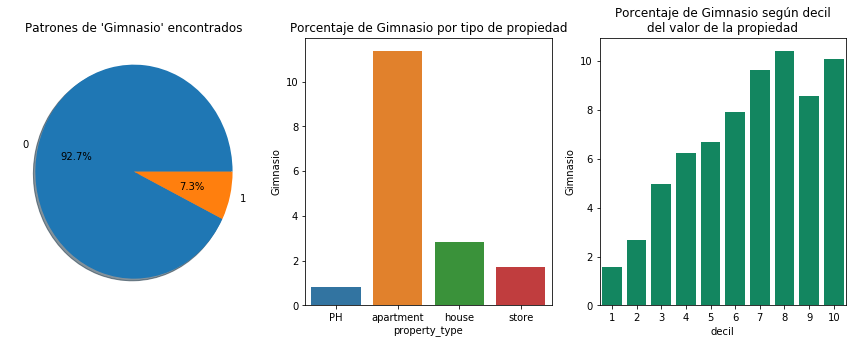

In [94]:
#Pattern
regexGimnasio = re.compile("(?P<gym>(gym)|(gimnasio)|(gimnacio))")

data['Gimnasio'] = 0
#Regex en la columna 'descripcion'
MatchsGimnasio = data['description_lower'].apply(lambda x: x if x is np.NaN else regexGimnasio.search(x))
maskGimnasio_Match = MatchsGimnasio.notnull()
data.loc[maskGimnasio_Match, 'Gimnasio'] = 1

#Regex en la columna 'title'
MatchsGimnasio = data['title_lower'].apply(lambda x: x if x is np.NaN else regexGimnasio.search(x))
maskGimnasio_Match = MatchsGimnasio.notnull()
data.loc[maskGimnasio_Match, 'Gimnasio'] = 1

chart_type('Gimnasio')

---
<b><a id='section_3_9'>3.9. Seguridad</a>  </b>

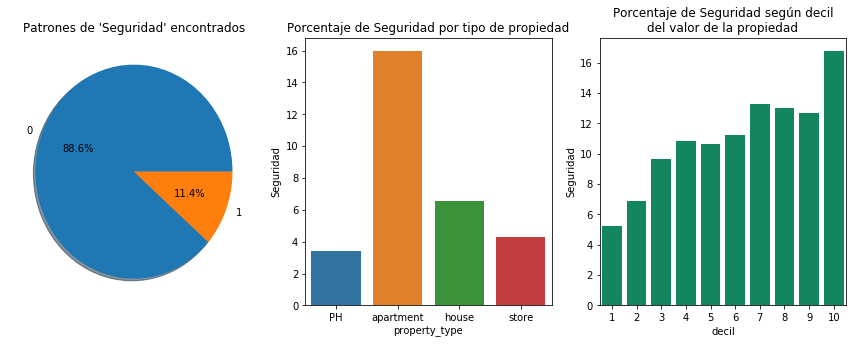

In [95]:
#Pattern
regexSeguridad = re.compile("(?P<seguridad>seguridad|vigilancia|c[a|á]maras|ojo de halc[o|ó]n|vigilador|garita|circuito cerrado|cctv|monitoreo|seg 24|24hr)+")

data['Seguridad'] = 0
#Regex en la columna 'descripcion'
MatchsSeguridad = data['description_lower'].apply(lambda x: x if x is np.NaN else regexSeguridad.search(x))
maskSeguridad_Match = MatchsSeguridad.notnull()
data.loc[maskSeguridad_Match, 'Seguridad'] = 1

#Regex en la columna 'title'
MatchsSeguridad = data['title_lower'].apply(lambda x: x if x is np.NaN else regexSeguridad.search(x))
maskSeguridad_Match = MatchsSeguridad.notnull()
data.loc[maskSeguridad_Match, 'Seguridad'] = 1

chart_type('Seguridad')

---
<b><a id='section_3_10'>3.10. A Reciclar</a>  </b>

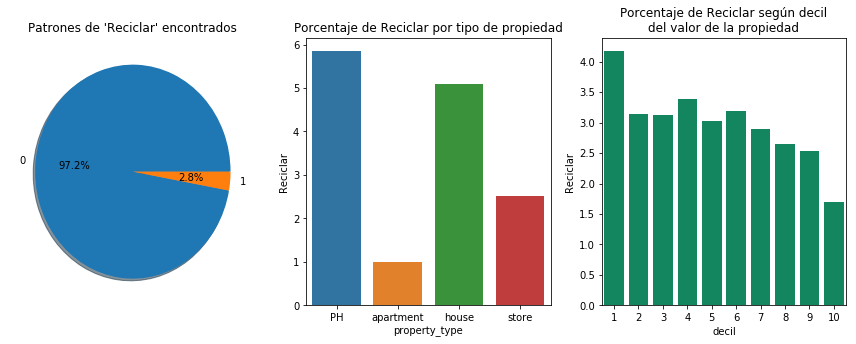

In [96]:
#Pattern
regexReciclar = re.compile("(?P<reciclar>reciclar|refaccionar|acondicionar|a terminar|para terminar)+")

data['Reciclar'] = 0
#Regex en la columna 'descripcion'
MatchsReciclar = data['description_lower'].apply(lambda x: x if x is np.NaN else regexReciclar.search(x))
maskReciclar_Match = MatchsReciclar.notnull()
data.loc[maskReciclar_Match, 'Reciclar'] = 1

#Regex en la columna 'title'
MatchsReciclar = data['title_lower'].apply(lambda x: x if x is np.NaN else regexReciclar.search(x))
maskReciclar_Match = MatchsReciclar.notnull()
data.loc[maskReciclar_Match, 'Reciclar'] = 1

chart_type('Reciclar')

---
<b><a id='section_3_11'>3.11. De Epoca</a>  </b>

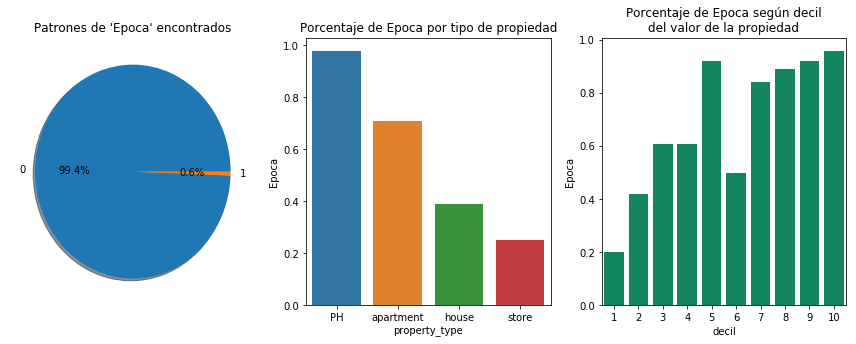

In [97]:
#Pattern
regexEpoca = re.compile("(?P<epoca>de [é|e]poca)+")

data['Epoca'] = 0
#Regex en la columna 'descripcion'
MatchsEpoca = data['description_lower'].apply(lambda x: x if x is np.NaN else regexEpoca.search(x))
maskEpoca_Match = MatchsEpoca.notnull()
data.loc[maskEpoca_Match, 'Epoca'] = 1

#Regex en la columna 'title'
MatchsEpoca = data['title_lower'].apply(lambda x: x if x is np.NaN else regexEpoca.search(x))
maskEpoca_Match = MatchsEpoca.notnull()
data.loc[maskEpoca_Match, 'Epoca'] = 1

chart_type('Epoca')

---
<b><a id=''> Cantidad de Cocheras</a>  </b>

In [98]:
#Primer pattern
regexCantCoch = re.compile('(?P<numero>\d{1})\s?(cochera|garage|auto\s|automovil|vehiculo|\scoche\s|\scoches\s)')

data['cantcocheras'] = np.nan

#Regex en la columna 'descripcion'
MatchsCantCoch = data['description_lower'].apply(lambda x: x if x is np.NaN else regexCantCoch.search(x))
maskCantCoch_NullsAndMatch = data['cantcocheras'].isnull() & MatchsCantCoch.notnull()
data.loc[maskCantCoch_NullsAndMatch, 'cantcocheras'] = MatchsCantCoch[maskCantCoch_NullsAndMatch].apply(lambda x: float(x.group("numero")))

#Regex en la columna 'title'
MatchsCantCoch = data['title_lower'].apply(lambda x: x if x is np.NaN else regexCantCoch.search(x))
maskCantCoch_NullsAndMatch = data['cantcocheras'].isnull() & MatchsCantCoch.notnull()
data.loc[maskCantCoch_NullsAndMatch, 'cantcocheras'] = MatchsCantCoch[maskCantCoch_NullsAndMatch].apply(lambda x: float(x.group("numero")))

data['cantcocheras'].value_counts()


2.0    1475
1.0     865
0.0     321
3.0     307
4.0     205
8.0     132
5.0     120
7.0      73
6.0      66
9.0      34
Name: cantcocheras, dtype: int64

In [99]:
#Segundo pattern
regexCantCoch2 = re.compile('(?P<numeroPalabra>uno|un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve)\s?(cochera|garage|auto\s|automovil|vehiculo|\scoche\s|\scoches\s)')

#Regex en la columna 'descripcion' usando la función MatchtoNumber
MatchsCantCoch2 = data['description_lower'].apply(lambda x: x if x is np.NaN else regexCantCoch2.search(x))
maskCantCoch2_NullsAndMatch = data['cantcocheras'].isnull() & MatchsCantCoch2.notnull()
data.loc[maskCantCoch2_NullsAndMatch, 'cantcocheras'] = MatchsCantCoch2[maskCantCoch2_NullsAndMatch].apply(MatchToNumber)

#Regex en la columna 'title' usando la función MatchtoNumber
MatchsCantCoch2 = data['title_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes2.search(x))
maskCantCoch2_NullsAndMatch = data['cantcocheras'].isnull() & MatchsCantCoch2.notnull()
data.loc[maskCantCoch2_NullsAndMatch, 'cantcocheras'] = MatchsCantCoch2[maskCantCoch2_NullsAndMatch].apply(MatchToNumber)

data['cantcocheras'].value_counts()

2.0    3066
1.0    1822
3.0     806
4.0     332
0.0     321
5.0     174
8.0     147
7.0      74
6.0      74
9.0      34
Name: cantcocheras, dtype: int64

---
<b><a id=''> Cantidad de baños</a>  </b>

In [100]:
# Primer Pattern
regexBanos = re.compile("(?P<numero>\d{1})\s?(baño|baños|banos|bano|banio|banios|baÃ±os|aÃ±os|toilette|toilettes|baÃ‘o)")

data['banos'] = np.nan

#Regex en la columna 'descripcion'
MatchsBanos = data['description_lower'].apply(lambda x: x if x is np.NaN else regexBanos.search(x))
maskBanos_NullsAndMatch = data['banos'].isnull() & MatchsBanos.notnull()
data.loc[maskBanos_NullsAndMatch, 'banos'] = MatchsBanos[maskBanos_NullsAndMatch].apply(lambda x: float(x.group("numero")))

#Regex en la columna 'title'
MatchsBanos = data['title_lower'].apply(lambda x: x if x is np.NaN else regexBanos.search(x))
maskBanos_NullsAndMatch = data['banos'].isnull() & MatchsBanos.notnull()
data.loc[maskBanos_NullsAndMatch, 'banos'] = MatchsBanos[maskBanos_NullsAndMatch].apply(lambda x: float(x.group("numero")))

data['banos'].value_counts()


2.0    5591
1.0    3696
3.0    1421
4.0     453
5.0     172
0.0     130
6.0      51
7.0      18
8.0      16
9.0       9
Name: banos, dtype: int64

In [101]:
# Segundo Pattern
regexBanos = re.compile("(?P<numeroPalabra>uno|un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve)\s?(baño|baños|banos|bano|banio|banios|baÃ±os|aÃ±os|toilette|toilettes|baÃ‘o)")

#Regex en la columna 'descripcion'
MatchsBanos = data['description_lower'].apply(lambda x: x if x is np.NaN else regexBanos.search(x))
maskBanos_NullsAndMatch = data['banos'].isnull() & MatchsBanos.notnull()
data.loc[maskBanos_NullsAndMatch, 'banos'] = MatchsBanos[maskBanos_NullsAndMatch].apply(MatchToNumber)

#Regex en la columna 'title'
MatchsBanos = data['title_lower'].apply(lambda x: x if x is np.NaN else regexBanos.search(x))
maskBanos_NullsAndMatch = data['banos'].isnull() & MatchsBanos.notnull()
data.loc[maskBanos_NullsAndMatch, 'banos'] = MatchsBanos[maskBanos_NullsAndMatch].apply(MatchToNumber)

data['banos'].value_counts()

1.0    10178
2.0     8246
3.0     1667
4.0      502
5.0      183
0.0      130
6.0       56
7.0       18
8.0       16
9.0        9
Name: banos, dtype: int64

In [102]:
data['banos'] = data.banos.fillna(1)
data.banos.value_counts()

1.0    91327
2.0     8246
3.0     1667
4.0      502
5.0      183
0.0      130
6.0       56
7.0       18
8.0       16
9.0        9
Name: banos, dtype: int64

---
<b><a id=''> Balcón</a>  </b>

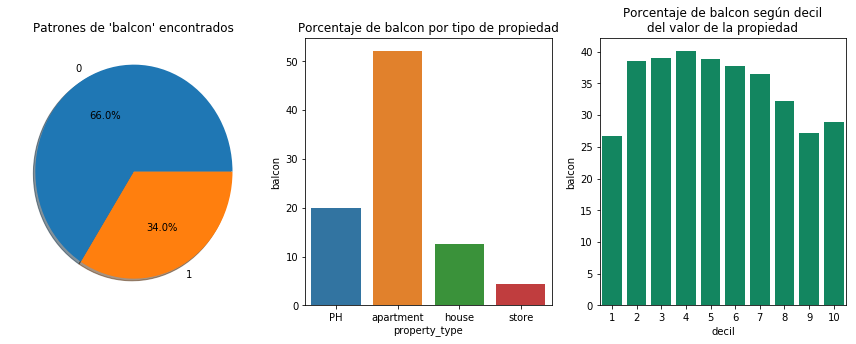

In [103]:
#Pattern
regexBalcon = re.compile("(?P<balcon>balcon|balcón|balcones)")

data['balcon'] = 0
#Regex en la columna 'descripcion'
MatchsBalcon = data['description_lower'].apply(lambda x: x if x is np.NaN else regexBalcon.search(x))
maskBalcon_Match = MatchsBalcon.notnull()
data.loc[maskBalcon_Match, 'balcon'] = 1

#Regex en la columna 'title'
MatchsBalcon = data['title_lower'].apply(lambda x: x if x is np.NaN else regexBalcon.search(x))
maskBalcon_Match = MatchsBalcon.notnull()
data.loc[maskBalcon_Match, 'balcon'] = 1

chart_type('balcon')

---
<b><a id=''> A estrenar</a>  </b>

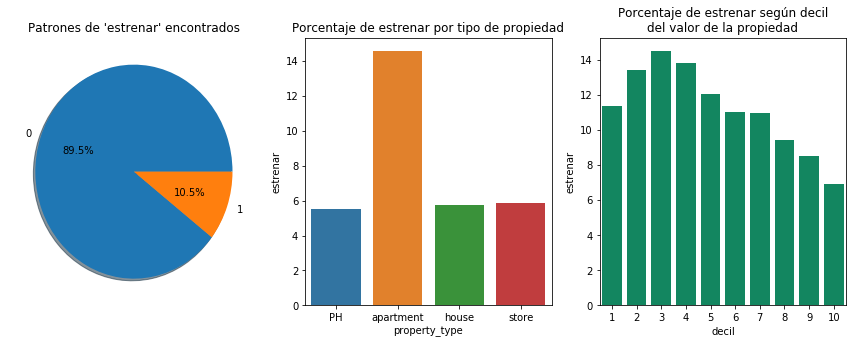

In [104]:
#Pattern
regexEstrenar = re.compile("(?P<Estrenar>(a estrenar)|(departamento nuevo))")

data['estrenar'] = 0
#Regex en la columna 'descripcion'
MatchsEstrenar = data['description_lower'].apply(lambda x: x if x is np.NaN else regexEstrenar.search(x))
maskEstrenar_Match = MatchsEstrenar.notnull()
data.loc[maskEstrenar_Match, 'estrenar'] = 1

#Regex en la columna 'title'
MatchsEstrenar = data['title_lower'].apply(lambda x: x if x is np.NaN else regexEstrenar.search(x))
maskEstrenar_Match = MatchsEstrenar.notnull()
data.loc[maskEstrenar_Match, 'estrenar'] = 1

chart_type('estrenar')

---
<b><a id=''> Calefacción central / Losa radiante</a>  </b>

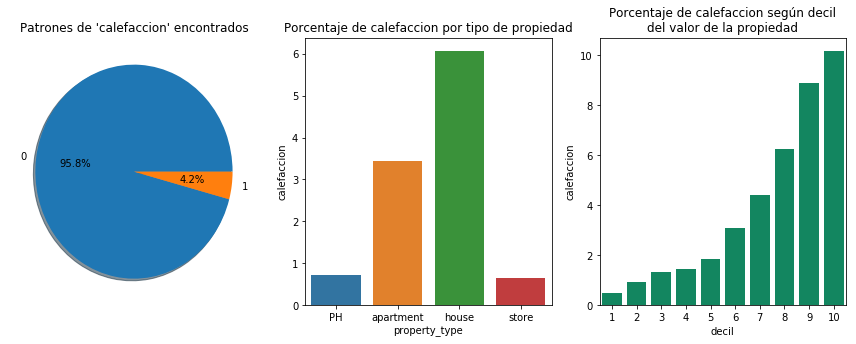

In [105]:
#Pattern
regexCalefaccion = re.compile("(?P<Calefaccion>(calefacciÃ³n por radiador)|(calefacciÃ³n central)|(calefaccion central)| \
(calefacción central)|(calefacciÃ³n por radiadores)|(calefaccion por losa radiante)|(calefacción por losa radiante))")

data['calefaccion'] = 0
#Regex en la columna 'descripcion'
MatchsCalefaccion = data['description_lower'].apply(lambda x: x if x is np.NaN else regexCalefaccion.search(x))
maskCalefaccion_Match = MatchsCalefaccion.notnull()
data.loc[maskCalefaccion_Match, 'calefaccion'] = 1

#Regex en la columna 'title'
MatchsCalefaccion = data['title_lower'].apply(lambda x: x if x is np.NaN else regexCalefaccion.search(x))
maskCalefaccion_Match = MatchsCalefaccion.notnull()
data.loc[maskCalefaccion_Match, 'calefaccion'] = 1

chart_type('calefaccion')

---
<b><a id='section_3_12'>3.12. Parque, Patio, Jardin</a>  </b>

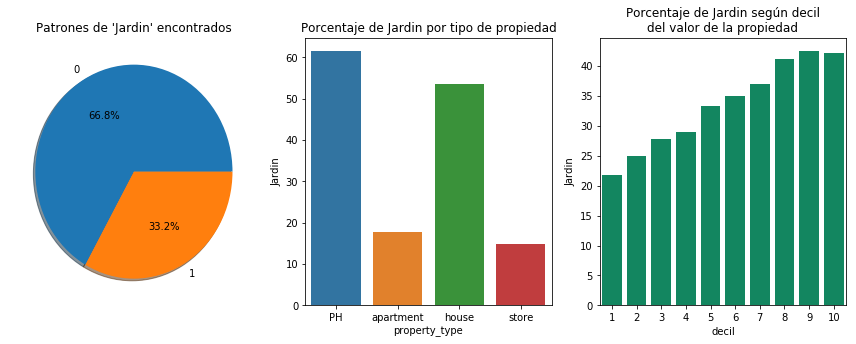

In [106]:
#Pattern
regexJardin = re.compile("(?P<parque>con parque|al parque|jard[i|í]n|patio)+")

data['Jardin'] = 0
#Regex en la columna 'descripcion'
MatchsJardin = data['description_lower'].apply(lambda x: x if x is np.NaN else regexJardin.search(x))
maskJardin_Match = MatchsJardin.notnull()
data.loc[maskJardin_Match, 'Jardin'] = 1

#Regex en la columna 'title'
MatchsJardin = data['title_lower'].apply(lambda x: x if x is np.NaN else regexJardin.search(x))
maskJardin_Match = MatchsJardin.notnull()
data.loc[maskJardin_Match, 'Jardin'] = 1

chart_type('Jardin')

---
---
<b><a id='section_4'><h4>4. Dataset final</h4></a></b>

Se construye un dataset con las variables que serán utilizadas en el modelo

In [107]:
data_final = data[['property_type','provincia','ciudad','departamento','barrio',
                   'price_aprox_usd_clean','surface_total_in_m2_clean','price_usd_per_m2_clean','rooms_clean',
                  'pileta','cochera','BarrioCerrado', 'Jacuzzi','Terraza','Quincho','Gimnasio', 'Seguridad', 'Reciclar', 'cantcocheras', 'banos', 'balcon', 'estrenar', 'calefaccion', 'Jardin',]]

Se conserva únicamente las observaciones donde el <u>precio por metro cuadrado no es nulo</u>, ya que esta será la variable a estimar en el modelo

In [108]:
mask = data['price_usd_per_m2_clean'].notnull()
data_final = data_final.loc[mask,:]

In [109]:
data_describe_final = pd.DataFrame(round(data_final.isnull().sum() /data_final.shape[0],2), columns= ['Porcentaje de nulos'])
data_describe_final['type'] = data_final.dtypes
data_describe_final = data_describe_final[['type','Porcentaje de nulos']]
values= []
example=[]
for x in data_final:
    values.append(len(data_final[x].unique()))
    example.append(data_final[x].unique())
data_describe_final['Valores distintos'] = values
data_describe_final['Ejemplos'] = example

print("El dataset que se utilizará para realizar el modelo tiene",data_final.shape[0]," observaciones.")
data_describe_final

El dataset que se utilizará para realizar el modelo tiene 69147  observaciones.


,type,Porcentaje de nulos,Valores distintos,Ejemplos
property_type,object,0.00,4,"[house, apartment, PH, store]"
provincia,object,0.00,28,"[Bs.As. G.B.A. Zona Norte, Santa Fe, Bs.As. G...."
ciudad,object,0.03,409,"[Tigre, Pilar, Funes, La Plata, Escobar, Pinam..."
departamento,object,0.63,516,"[None, Tigre, Villa Rosa, Village Golf & Tenni..."
barrio,object,0.99,17,"[None, Barrio Los Lagos, Barrio Los Alisos, Ba..."
price_aprox_usd_clean,float64,0.00,6268,"[437000.0, 467000.0, 345000.0, 325000.0, 40000..."
surface_total_in_m2_clean,float64,0.00,1663,"[296.53925503980093, 318.2372493110059, 303.77..."
price_usd_per_m2_clean,float64,0.00,4030,"[1474.0, 1467.0, 1136.0, 464.0, 1006.0, 1074.0..."
rooms_clean,float64,0.11,8,"[3.0, nan, 2.0, 4.0, 5.0, 1.0, 7.0, 6.0]"
pileta,int64,0.00,2,"[1, 0]"


In [110]:
data_final = pd.get_dummies(data = data_final, columns = ["ciudad"], drop_first = True)

---
---
<b><a id='section_4'><h4>4.1. Sinergia (multiplicacion de variables)</h4></a></b>

In [111]:
data_final = pd.get_dummies(data = data_final, columns = [ "property_type"], drop_first = False)

In [112]:
data_final['house_mas_pileta'] = data_final['property_type_house'] * data_final['pileta']
data_final['apartment_mas_cochera'] = data_final['property_type_apartment'] * data_final['cochera']
data_final['ph_mas_pileta'] = data_final['property_type_PH'] * data_final['pileta']
data_final['ph_mas_cochera'] = data_final['property_type_PH'] * data_final['cochera']
data_final['rooms_x_banos'] = data_final['rooms_clean'] * data_final['banos']

In [113]:
data_final = data_final.drop(["property_type_PH"], axis = 1)

---

In [114]:
data_final.columns
data_final_model = data_final

In [115]:
data_final = data_final_model
data_final = data_final.drop(["barrio", "departamento", 'cantcocheras'], axis = 1)

data_final.dropna(inplace = True)
data_final["constant"] = 1

In [116]:
data_final.shape

(61281, 435)

In [117]:
data_features = data_final.drop(["price_aprox_usd_clean","price_usd_per_m2_clean","provincia"], axis = 1)
target = data_final["price_usd_per_m2_clean"]

In [118]:
Xtrain , Xtest , ytrain , ytest = train_test_split(data_features,target)

Xtrain = sm.add_constant(Xtrain)
model_sm = sm.OLS(ytrain,Xtrain).fit()

In [119]:
model_sm.summary()

C:\work\ia\Anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\work\ia\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\work\ia\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\work\ia\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     price_usd_per_m2_clean   R-squared:                       0.674
Model:                                OLS   Adj. R-squared:                  0.671
Method:                     Least Squares   F-statistic:                     254.0
Date:                    Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                            17:34:51   Log-Likelihood:            -3.4708e+05
No. Observations:                   45960   AIC:                         6.949e+05
Df Residuals:                       45588   BIC:                         6.982e+05
Df Model:                             371                                         
Covariance Type:                nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
surface_total_in_m2_clean                     -1.9511      0.024    -82.351      0.000      -1.998      -1.905
rooms_clean                                   -9.9931      6.684     -1.495      0.135     -23.094       3.108
pileta                                       123.5684      8.491     14.553      0.000     106.926     140.211
cochera                                       -4.4220      7.683     -0.576      0.565     -19.481      10.637
BarrioCerrado                                -32.6064     14.742     -2.212      0.027     -61.500      -3.713
Jacuzzi                                      207.2430     14.599     14.195      0.000     178.628     235.858
Terraza                                      -25.1708      5.379     -4.680      0.000     -35.713     -14.629
Quincho                                       23.2253      6.833      3.399      0.001       9.832      36.618
Gimnasio                                     138.0004     10.576     13.048      0.000     117.271     158.730
Seguridad                                     42.9496      7.721      5.563      0.000      27.817      58.083
Reciclar                                    -221.8416     13.574    -16.343      0.000    -248.447    -195.236
banos                                          8.9281     20.668      0.432      0.666     -31.581      49.437
balcon                                        54.9440      5.121     10.730      0.000      44.907      64.981
estrenar                                      59.3059      6.788      8.736      0.000      46.000      72.611
calefaccion                                  121.5607     11.579     10.499      0.000      98.866     144.255
Jardin                                       -96.8690      5.237    -18.496      0.000    -107.134     -86.604
ciudad_Achiras                             -1.372e-09   6.21e-10     -2.210      0.027   -2.59e-09   -1.55e-10
ciudad_Agronomía                             356.7468     99.488      3.586      0.000     161.749     551.745
ciudad_Agua Blanca                          -490.6076    462.874     -1.060      0.289   -1397.849     416.634
ciudad_Agua de Oro                           212.4889    327.575      0.649      0.517    -429.564     854.542
ciudad_Aguas Verdes                         -744.8608    327.427     -2.275      0.023   -1386.623    -103.099
ciudad_Aldea Brasilera                      1.415e-09    1.2e-09      1.175      0.240   -9.46e-10    3.77e-09
ciudad_Almafuerte                           1.082e-09   7.62e-10      1.420      0.155   -4.11e-10    2.57e-09
ciudad_Almagro                               461.6553     23.686     19.490      0.000     415.230     508.081
ciudad_Almirante Brown                    

In [120]:
model_reg_lasso = sm.OLS(ytrain,Xtrain).fit_regularized(method='elastic_net', alpha=0.1, L1_wt = 1)

In [121]:
prediction_sm = model_sm.predict(Xtest)
prediction_lasso = model_reg_lasso.predict(Xtest)

print ('R2 Statmodels OLS:', r2_score(ytest, prediction_sm).round(2))
print ('R2 Statmodels Lasso:', r2_score(ytest, prediction_lasso).round(2))

R2 Statmodels OLS: 0.67
R2 Statmodels Lasso: 0.65


In [123]:
model_skl_LassoCV = linear_model.LassoCV(alphas=np.linspace(0.001,1, 100), cv=3, normalize=True)
model_skl_LassoCV.fit(Xtrain, ytrain)
predictions_lassoCV_skl = model_skl_LassoCV.predict(Xtest)

In [124]:
print ("R2 SkLearn LassoCV:", model_skl_LassoCV.score(Xtest, ytest))
print ("R2 SkLearn LassoCV:", r2_score(ytest, predictions_lassoCV_skl))
print ("alpha:", model_skl_LassoCV.alpha_)

betas = pd.DataFrame(data= model_skl_LassoCV.coef_ , index=data_features.columns, columns=['Betas'])
pd.set_option('display.max_rows', 600)

R2 SkLearn LassoCV: 0.6707373215423197
R2 SkLearn LassoCV: 0.6707373215423197
alpha: 0.001


In [126]:
betas_0_mask = betas.Betas == 0
betas.loc[betas_0_mask,:]

,Betas
ciudad_Achiras,0.0
ciudad_Aldea Brasilera,0.0
ciudad_Almafuerte,0.0
ciudad_Alvear,0.0
ciudad_Apóstoles,0.0
ciudad_Ascochinga,0.0
ciudad_Baradero,0.0
ciudad_Bella Vista,0.0
ciudad_Bialet Massé,0.0
ciudad_Calmayo,0.0


In [127]:
data_final.columns

Index(['provincia', 'price_aprox_usd_clean', 'surface_total_in_m2_clean',
       'price_usd_per_m2_clean', 'rooms_clean', 'pileta', 'cochera',
       'BarrioCerrado', 'Jacuzzi', 'Terraza',
       ...
       'ciudad_Zárate', 'property_type_apartment', 'property_type_house',
       'property_type_store', 'house_mas_pileta', 'apartment_mas_cochera',
       'ph_mas_pileta', 'ph_mas_cochera', 'rooms_x_banos', 'constant'],
      dtype='object', length=435)

In [128]:
dataCiudad = data_final

### Regresion para capital federal

In [129]:
dataCiudad = data[['property_type','provincia','ciudad','departamento','barrio',
                   'price_aprox_usd_clean','surface_total_in_m2_clean','price_usd_per_m2_clean','rooms_clean',
                  'pileta','cochera','BarrioCerrado', 'Jacuzzi','Terraza','Quincho','Gimnasio', 'Seguridad', 'Reciclar', 'cantcocheras', 'banos', 'balcon', 'estrenar', 'calefaccion', 'Jardin',]]

In [130]:
dataCiudad = dataCiudad[dataCiudad.provincia == "Capital Federal"]
dataCiudad = dataCiudad.drop(["barrio", "departamento", 'cantcocheras'], axis = 1)

dataCiudad.head()

,property_type,provincia,ciudad,price_aprox_usd_clean,surface_total_in_m2_clean,price_usd_per_m2_clean,rooms_clean,pileta,cochera,BarrioCerrado,...,Terraza,Quincho,Gimnasio,Seguridad,Reciclar,banos,balcon,estrenar,calefaccion,Jardin
118,house,Capital Federal,Belgrano,NaN,464.000000,NaN,5.0,0,1,0,...,1,0,0,1,0,1.0,1,0,0,1
168,house,Capital Federal,Flores,265000.0,228.552206,1159.0,4.0,1,1,0,...,1,1,0,0,0,1.0,0,0,0,0
171,house,Capital Federal,Caballito,NaN,395.000000,NaN,4.0,1,1,0,...,1,0,0,1,0,1.0,1,0,0,0
176,house,Capital Federal,Nuñez,820000.0,420.000000,1952.0,2.0,0,1,0,...,1,1,0,1,0,2.0,1,0,0,1
177,house,Capital Federal,Belgrano,820000.0,420.000000,1952.0,2.0,0,1,0,...,1,1,0,1,0,2.0,1,0,0,1


In [131]:
dataCiudad = pd.get_dummies(data = dataCiudad, columns = ["ciudad", "property_type"], drop_first = True)
dataCiudad.head()

,provincia,price_aprox_usd_clean,surface_total_in_m2_clean,price_usd_per_m2_clean,rooms_clean,pileta,cochera,BarrioCerrado,Jacuzzi,Terraza,...,ciudad_Villa Pueyrredón,ciudad_Villa Real,ciudad_Villa Riachuelo,ciudad_Villa Santa Rita,ciudad_Villa Soldati,ciudad_Villa Urquiza,ciudad_Villa del Parque,property_type_apartment,property_type_house,property_type_store
118,Capital Federal,NaN,464.000000,NaN,5.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
168,Capital Federal,265000.0,228.552206,1159.0,4.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
171,Capital Federal,NaN,395.000000,NaN,4.0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
176,Capital Federal,820000.0,420.000000,1952.0,2.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
177,Capital Federal,820000.0,420.000000,1952.0,2.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [132]:
dataCiudad.dropna(inplace = True)
dataCiudadTarget = dataCiudad.price_usd_per_m2_clean

dataCiudadFeatures = dataCiudad.drop(['price_aprox_usd_clean','price_usd_per_m2_clean','provincia'], axis = 1)
dataCiudadFeatures["constant"] = 1

In [133]:
dataCiudadFeatures.head()

,surface_total_in_m2_clean,rooms_clean,pileta,cochera,BarrioCerrado,Jacuzzi,Terraza,Quincho,Gimnasio,Seguridad,...,ciudad_Villa Real,ciudad_Villa Riachuelo,ciudad_Villa Santa Rita,ciudad_Villa Soldati,ciudad_Villa Urquiza,ciudad_Villa del Parque,property_type_apartment,property_type_house,property_type_store,constant
168,228.552206,4.0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
176,420.000000,2.0,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,1
177,420.000000,2.0,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,1
253,637.921032,3.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
261,271.000000,3.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [139]:
Xtrain , Xtest , ytrain , ytest = train_test_split(dataCiudadFeatures,dataCiudadTarget)
model_sm = sm.OLS(ytrain,Xtrain).fit()
model_reg_lasso = sm.OLS(ytrain,Xtrain).fit_regularized(method='elastic_net', alpha=0.02, L1_wt = 1)

In [140]:
#model_sm.summary()
print(Xtest.shape)
print(ytest.shape)
type(ytest)

(4373, 76)
(4373,)


pandas.core.series.Series

In [141]:
prediction_sm = model_sm.predict(Xtest)
print ('R2 Statmodels OLS:', r2_score(ytest, prediction_sm).round(2))

R2 Statmodels OLS: 0.56


### Regesion para NO capital federal

In [142]:
dataNoCiudad = data[['property_type','provincia','ciudad','departamento','barrio',
                   'price_aprox_usd_clean','surface_total_in_m2_clean','price_usd_per_m2_clean','rooms_clean',
                  'pileta','cochera','BarrioCerrado', 'Jacuzzi','Terraza','Quincho','Gimnasio', 'Seguridad', 'Reciclar', 'cantcocheras', 'banos', 'balcon', 'estrenar', 'calefaccion', 'Jardin',]]

In [143]:
dataNoCiudad = dataNoCiudad[dataNoCiudad.provincia != "Capital Federal"]
dataNoCiudad = dataNoCiudad.drop(["barrio", "departamento", 'cantcocheras'], axis = 1)

dataNoCiudad.head()

,property_type,provincia,ciudad,price_aprox_usd_clean,surface_total_in_m2_clean,price_usd_per_m2_clean,rooms_clean,pileta,cochera,BarrioCerrado,...,Terraza,Quincho,Gimnasio,Seguridad,Reciclar,banos,balcon,estrenar,calefaccion,Jardin
0,house,Bs.As. G.B.A. Zona Norte,Tigre,NaN,316.000000,NaN,3.0,1,1,0,...,1,0,0,1,0,1.0,1,0,0,0
1,house,Bs.As. G.B.A. Zona Norte,Tigre,345000.0,NaN,NaN,3.0,1,1,1,...,1,0,0,1,0,1.0,0,0,0,0
2,house,Bs.As. G.B.A. Zona Norte,Tigre,NaN,303.000000,NaN,3.0,1,1,0,...,1,0,0,1,0,1.0,0,0,0,1
3,house,Bs.As. G.B.A. Zona Norte,Tigre,NaN,335.000000,NaN,3.0,1,0,0,...,1,0,0,1,0,1.0,0,0,0,1
4,house,Bs.As. G.B.A. Zona Norte,Tigre,437000.0,296.539255,1474.0,3.0,1,0,0,...,1,0,0,1,0,1.0,0,0,0,0


In [144]:
dataNoCiudad = pd.get_dummies(data = dataNoCiudad, columns = ["ciudad", "property_type"], drop_first = True)
dataNoCiudad.head()

,provincia,price_aprox_usd_clean,surface_total_in_m2_clean,price_usd_per_m2_clean,rooms_clean,pileta,cochera,BarrioCerrado,Jacuzzi,Terraza,...,ciudad_Villa del Totoral,ciudad_Villarino,ciudad_Vistalba,ciudad_Wenceslao Escalante,ciudad_Yerba Buena,ciudad_Zárate,ciudad_Álvarez,property_type_apartment,property_type_house,property_type_store
0,Bs.As. G.B.A. Zona Norte,NaN,316.000000,NaN,3.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,Bs.As. G.B.A. Zona Norte,345000.0,NaN,NaN,3.0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,Bs.As. G.B.A. Zona Norte,NaN,303.000000,NaN,3.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,Bs.As. G.B.A. Zona Norte,NaN,335.000000,NaN,3.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,Bs.As. G.B.A. Zona Norte,437000.0,296.539255,1474.0,3.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [145]:
dataNoCiudad.dropna(inplace = True)
dataNoCiudadTarget = dataNoCiudad.price_usd_per_m2_clean

dataNoCiudadFeatures = dataNoCiudad.drop(['price_aprox_usd_clean','price_usd_per_m2_clean','provincia'], axis = 1)
dataNoCiudadFeatures["constant"] = 1

In [146]:
dataNoCiudadFeatures.head()

,surface_total_in_m2_clean,rooms_clean,pileta,cochera,BarrioCerrado,Jacuzzi,Terraza,Quincho,Gimnasio,Seguridad,...,ciudad_Villarino,ciudad_Vistalba,ciudad_Wenceslao Escalante,ciudad_Yerba Buena,ciudad_Zárate,ciudad_Álvarez,property_type_apartment,property_type_house,property_type_store,constant
4,296.539255,3.0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
5,318.237249,3.0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
6,303.771920,3.0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7,700.000000,3.0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
15,180.000000,3.0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [147]:
XtrainN , XtestN , ytrainN , ytestN = train_test_split(dataNoCiudadFeatures,dataNoCiudadTarget)

#Xtrain = sm.add_constant(Xtrain)
model_smN = sm.OLS(ytrainN,XtrainN).fit()

#model_reg_lasso = sm.OLS(ytrain,Xtrain).fit_regularized(method='elastic_net', alpha=0.02, L1_wt = 1)

In [148]:
model_smN.summary()

C:\work\ia\Anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\work\ia\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\work\ia\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\work\ia\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     price_usd_per_m2_clean   R-squared:                       0.599
Model:                                OLS   Adj. R-squared:                  0.595
Method:                     Least Squares   F-statistic:                     155.6
Date:                    Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                            18:01:29   Log-Likelihood:            -2.4722e+05
No. Observations:                   32841   AIC:                         4.951e+05
Df Residuals:                       32528   BIC:                         4.977e+05
Df Model:                             312                                         
Covariance Type:                nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
surface_total_in_m2_clean                     -1.8639      0.024    -76.703      0.000      -1.912      -1.816
rooms_clean                                  -16.3420      3.410     -4.793      0.000     -23.025      -9.659
pileta                                       177.9941      7.044     25.268      0.000     164.187     191.801
cochera                                       55.2438      5.366     10.295      0.000      44.726      65.762
BarrioCerrado                                -17.6467     14.570     -1.211      0.226     -46.205      10.911
Jacuzzi                                      233.2237     17.500     13.327      0.000     198.924     267.524
Terraza                                      -18.0740      6.324     -2.858      0.004     -30.469      -5.679
Quincho                                       23.4809      7.659      3.066      0.002       8.469      38.493
Gimnasio                                     100.1749     12.307      8.139      0.000      76.052     124.298
Seguridad                                      1.7402      9.311      0.187      0.852     -16.509      19.990
Reciclar                                    -201.3957     15.307    -13.157      0.000    -231.398    -171.393
banos                                         37.4193      6.613      5.659      0.000      24.458      50.380
balcon                                        70.2480      6.101     11.514      0.000      58.289      82.206
estrenar                                      69.2519      8.024      8.631      0.000      53.524      84.979
calefaccion                                  154.7454     12.666     12.218      0.000     129.920     179.571
Jardin                                       -98.1379      5.831    -16.831      0.000    -109.566     -86.710
ciudad_Adolfo Alsina                        1.339e-09   6.03e-10      2.221      0.026    1.57e-10    2.52e-09
ciudad_Agua Blanca                          -269.1758    452.239     -0.595      0.552   -1155.580     617.228
ciudad_Agua de Oro                          5.626e-10   4.66e-10      1.207      0.227   -3.51e-10    1.48e-09
ciudad_Aguas Verdes                         -470.2486    320.004     -1.470      0.142   -1097.468     156.971
ciudad_Aldea Brasilera                      -112.4449    452.308     -0.249      0.804    -998.985     774.095
ciudad_Aldea Salto                         -7.822e-10   4.78e-10     -1.636      0.102   -1.72e-09    1.55e-10
ciudad_Alejandro Roca                      -1.066e-09   5.77e-10     -1.846      0.065    -2.2e-09    6.58e-11
ciudad_Almafuerte                          -2.701e-10   3.48e-10     -0.775      0.438   -9.53e-10    4.13e-10
ciudad_Almirante Brown                    